# <a id='toc1_'></a>[Lezione 4 - Librerie, Numpy, Matplotlib, Pandas](#toc0_)

- Autore: Teo Bucci ([@teobucci](https://github.com/teobucci))

**Table of contents**<a id='toc0_'></a>    
- [Lezione 4 - Librerie, Numpy, Matplotlib, Pandas](#toc1_)    
- [Numpy](#toc2_)    
  - [Basi: come importare un modulo](#toc2_1_)    
  - [I nostri primi amici: i `numpy.ndarray` in 1D](#toc2_2_)    
  - [Selezionare elementi di un `ndarray`](#toc2_3_)    
  - [I fratelli più grandi: `numpy.ndarray` in 2D e oltre](#toc2_4_)    
  - [Comandi per costruire array](#toc2_5_)    
  - [Proprietà degli `ndarray`](#toc2_6_)    
  - [Operazioni basilari tra `ndarray`](#toc2_7_)    
  - [È tutto veramente così semplice](#toc2_8_)    
  - [Dove il gioco si fa duro: concatenate, split, reshape, broadcast](#toc2_9_)    
    - [Concatenate](#toc2_9_1_)    
    - [Split](#toc2_9_2_)    
    - [Reshape](#toc2_9_3_)    
    - [Broadcast](#toc2_9_4_)    
  - [Matplotlib enters the chat](#toc2_10_)    
    - [Numpy: efficienza in tempo](#toc2_10_1_)    
    - [Numpy: efficienza in memoria](#toc2_10_2_)    
  - [Esempio probabilistico: Monty Hall](#toc2_11_)    
  - [Esempio statistico](#toc2_12_)    
  - [Esempio calcolistico](#toc2_13_)    
- [Pandas](#toc3_)    
  - [Leggere dei dati](#toc3_1_)    
  - [Esempio applicativo 1: Abandoned Shopping Trolleys in Bristol rivers](#toc3_2_)    
    - [Esplorazione di un dataframe](#toc3_2_1_)    
    - [Selezionare parti di un dataframe (indexing)](#toc3_2_2_)    
    - [Indexing basato su condizioni](#toc3_2_3_)    
    - [Il mattoncino base di Pandas: le Series](#toc3_2_4_)    
    - [Come Matplotlib è sempre dietro l'angolo](#toc3_2_5_)    
  - [Esempio applicativo 2: Pokémon](#toc3_3_)    
    - [Valori mancanti (NA, missing values)](#toc3_3_1_)    
    - [Come salvare un oggetto in Python](#toc3_3_2_)    
    - [Raggruppare dati](#toc3_3_3_)    
    - [Rispondere con dei grafici!](#toc3_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


![](assets/get-started.gif)

Le librerie sono uno dei punti cardini su cui si fonda Python e motivo della sua grandezza.
In Python sono organizzate tramite **moduli**.
Un modulo è un file che contiene codice Python: può contenere funzioni, classi e variabili.

# <a id='toc2_'></a>[Numpy](#toc0_)

## <a id='toc2_1_'></a>[Basi: come importare un modulo](#toc0_)
L'oggetto `numpy` conterrà il modulo Numpy

In [3]:
import numpy
media = numpy.mean([3,6,2009])
print(media-6)

666.6666666666666


L'oggetto `np` conterrà il modulo Numpy

In [4]:
import numpy as np
media = np.mean([3,6,2009])
print(media-6)

666.6666666666666


Importiamo solo l'elemento `mean` di Numpy

In [5]:
from numpy import mean
media = mean([3,6,2009])
print(media-6)

666.6666666666666


Importa tutto (sconsiglio)

In [6]:
from numpy import *
media = mean([3,6,2009])
print(media-6)

666.6666666666666


![](assets/dont-do-this.gif)

Elenco di tutte le funzioni e sottomoduli di Numpy:

In [7]:
# print(*dir(np),sep="\n")

## <a id='toc2_2_'></a>[I nostri primi amici: i `numpy.ndarray` in 1D](#toc0_)

Diversamente dalle liste, gli array di Numpy devono contenere elementi dello stesso tipo. Se i tipi non sono uguali, viene tentato un upcast.

In [8]:
python_list = [1, 2, 3, 4, 5]
print(python_list)
print(type(python_list))

[1, 2, 3, 4, 5]
<class 'list'>


In [9]:
numpy_array = np.array(python_list)
print(numpy_array)
print(type(numpy_array))
print(type(numpy_array[0]))

[1 2 3 4 5]
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [10]:
numpy_array_floats = np.array(python_list, dtype= np.float32)
print(numpy_array_floats)
print(type(numpy_array_floats))
print(type(numpy_array_floats[0]))

[1. 2. 3. 4. 5.]
<class 'numpy.ndarray'>
<class 'numpy.float32'>


Creiamo il nostro primo array contenente interi casuali fino a 10, di 6 elementi.

Ricordiamoci di fissare il seed, quello di Numpy è diverso da quello di Python normale.

In [11]:
np.random.seed(42)

In [12]:
x = np.random.randint(10, size=6)  
x

array([6, 3, 7, 4, 6, 9])

## <a id='toc2_3_'></a>[Selezionare elementi di un `ndarray`](#toc0_)

In [13]:
x[1] # secondo elemento

3

In [14]:
x[-1]  # ultimo elemento

9

In [15]:
x[:3]  # primi 3 elementi

array([6, 3, 7])

In [16]:
x[:-2]  # tutti tranne gli ultimi due

array([6, 3, 7, 4])

In [17]:
x[1:3]  # dal secondo al terzo (gli intervalli sono sempre del tipo [,) secondo estremo escluso)

array([3, 7])

## <a id='toc2_4_'></a>[I fratelli più grandi: `numpy.ndarray` in 2D e oltre](#toc0_)

![](assets/numpy.jpeg)

In [18]:
x2 = np.random.random(size=(3,4))  
x2

array([[0.15599452, 0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985, 0.83244264],
       [0.21233911, 0.18182497, 0.18340451, 0.30424224]])

Selezionare parti di un array multidimensionale

In [19]:
x2[0, 0] # prima riga, prima colonna

0.15599452033620265

In [20]:
x2[:2, :3]  # prime due righe, prime tre colonne

array([[0.15599452, 0.05808361, 0.86617615],
       [0.70807258, 0.02058449, 0.96990985]])

In [21]:
x2[:, 1]  # seconda colonna

array([0.05808361, 0.02058449, 0.18182497])

In [22]:
x2[1]  # seconda riga

array([0.70807258, 0.02058449, 0.96990985, 0.83244264])

In [23]:
x2[1,:]  # seconda riga

array([0.70807258, 0.02058449, 0.96990985, 0.83244264])

<font color='red'>**IMPORTANTE:**</font> Quando si prende un subarray, non si ottiene una copia come nel caso delle liste, bensì una _view_. Vediamo in pratica cosa succede se modifichiamo un subarray!

In [24]:
x2[:2,1:]

array([[0.05808361, 0.86617615, 0.60111501],
       [0.02058449, 0.96990985, 0.83244264]])

In [25]:
x2[:2,1:] = 4
x2

array([[0.15599452, 4.        , 4.        , 4.        ],
       [0.70807258, 4.        , 4.        , 4.        ],
       [0.21233911, 0.18182497, 0.18340451, 0.30424224]])

In [26]:
x3 = np.random.randint(10, size=(3, 4, 5))  
x3

array([[[5, 8, 0, 9, 2],
        [6, 3, 8, 2, 4],
        [2, 6, 4, 8, 6],
        [1, 3, 8, 1, 9]],

       [[8, 9, 4, 1, 3],
        [6, 7, 2, 0, 3],
        [1, 7, 3, 1, 5],
        [5, 9, 3, 5, 1]],

       [[9, 1, 9, 3, 7],
        [6, 8, 7, 4, 1],
        [4, 7, 9, 8, 8],
        [0, 8, 6, 8, 7]]])

In [27]:
x3[0]

array([[5, 8, 0, 9, 2],
       [6, 3, 8, 2, 4],
       [2, 6, 4, 8, 6],
       [1, 3, 8, 1, 9]])

In [28]:
x3[:,0,1]

array([8, 9, 1])

## <a id='toc2_5_'></a>[Comandi per costruire array](#toc0_)

Array di soli `0`

In [29]:
a = np.zeros(shape=(5))
a

array([0., 0., 0., 0., 0.])

Array di soli `1`

In [30]:
b = np.ones(shape=(1,2))
b

array([[1., 1.]])

Array costante

In [31]:
c = np.full(shape=(2,2), fill_value=7)
c

array([[7, 7],
       [7, 7]])

Matrice identità

In [32]:
d = np.eye(2)
d

array([[1., 0.],
       [0., 1.]])

Costruzione di intervalli
- `arange(stop)`: i valori vengono generati all'interno dell'intervallo semiaperto `[0, stop)` (in altre parole, l'intervallo che include l'avvio ma esclude lo stop).
- `arange(start, stop)`: i valori vengono generati all'interno dell'intervallo semiaperto `[start, stop)`.
- `arange(start, stop, step)` I valori vengono generati all'interno dell'intervallo semiaperto `[start, stop)`, con la spaziatura tra i valori data da step.

In [33]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- `linspace(start, stop, num=50, ...)`

In [34]:
np.linspace(0, 100, num=21)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [35]:
e = np.empty(3) # brutta roba -> cosa ci sarà dentro?
print(e)

print(type(e[0]))
print(e.dtype)

[1.5e-323 2.0e-323 2.5e-323]
<class 'numpy.float64'>
float64


## <a id='toc2_6_'></a>[Proprietà degli `ndarray`](#toc0_)

In [36]:
d.shape

(2, 2)

In [37]:
d.dtype

dtype('float64')

In [38]:
d.ndim

2

In [39]:
d.size

4

## <a id='toc2_7_'></a>[Operazioni basilari tra `ndarray`](#toc0_)

Numpy fa un _overload_ degli operatori base per funzionare in modo **element-wise**

In [40]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

In [41]:
x + y

array([5, 7, 9])

In [42]:
x * y

array([ 4, 10, 18])

Ma possiamo naturalmente fare anche tantissime [operazioni algebriche](https://numpy.org/doc/stable/reference/routines.linalg.html)

- prodotto scalare `np.dot`
- prodotto vettoriale `np.cross`
- [prodotto interno](https://en.wikipedia.org/wiki/Inner_product_space) `np.inner`
- moltiplicazione matriciale `np.matmul`
- Singular Value Decomposition `np.linalg.svd`
- decomposizione di Cholesky `np.linalg.cholesky`
- autovalori e autovettori `np.linalg.eig`
- numero di condizionamento di una matrice `np.linalg.cond`
- determinante di una matrice `np.linalg.det`
- traccia di una matrice `np.trace`
- risoluzione di un sistema lineare `np.linalg.solve`
- inversa di una matrice `np.linalg.inv`

Proviamo il primo

In [43]:
np.dot(x, y)

32

In [44]:
np.dot(x, y) == x[0] * y[0] + x[1] * y[1] + x[2] * y[2]

True

Numpy contiene anche funzioni matematiche di base (`np.sin`, `np.cos`, `np.exp`, `np.log`) così come funzioni aggreganti (`np.sum`, `np.mean`, `np.min`, `np.max`) e costanti (`np.pi`). La [documentazione](https://numpy.org/doc/stable/reference/routines.linalg.html) è molto ben fatta.

In [45]:
values = np.array([0, np.pi/2, np.pi])
sines = np.sin(values)
sines

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

## <a id='toc2_8_'></a>[È tutto veramente così semplice](#toc0_)

Consideriamo le serie storiche dei valori di 4 azioni

In [46]:
stocks = [
    [7.558, 7.518, 7.61, 7.55, 7.392, 7.555, 7.495, 7.663, 7.612, 7.671, 7.59, 7.627, 7.575, 7.401, 7.42, 7.25, 7.362, 7.431, 7.363, 7.32, 7.465, 7.488, 7.431, 7.442, 7.459],
    [7.809, 7.774, 7.666, 7.696, 7.623, 7.75, 7.542, 7.654, 7.609, 7.597, 7.475, 7.607, 7.674, 7.633, 7.413, 6.97, 7.083, 6.969, 6.82, 6.677, 6.855, 6.687, 6.685, 6.484, 6.472],
    [163.05, 162.85, 165.4, 161.85, 160.7, 162.6, 161.25, 160.8, 160.05, 162.1, 161.65, 162.35, 160.7, 160.55, 159.9, 154.8, 156.35, 156.45, 157.05, 154.9, 157.2, 156.25, 157.05, 157, 155],
    [1.8012, 1.804, 1.7892, 1.7758, 1.7706, 1.7938, 1.7604, 1.7934, 1.8004, 1.776, 1.7768, 1.7706, 1.7546, 1.7404, 1.72, 1.632, 1.6424, 1.6132, 1.608, 1.5806, 1.6242, 1.6124, 1.6054, 1.5854, 1.5858]
]

Come facevano le persone prima di Numpy:

In [47]:
stocks_mean = [sum(st)/len(st) for st in stocks]
stocks_std = [(sum([(st - stm[1])**2 for st in stm[0]])/(len(stm[0])-1))**0.5 for stm in zip(stocks,stocks_mean)]
correlations = [[sum([(stocks[i][k]-stocks_mean[i])*(stocks[j][k]-stocks_mean[i]) for k in range(len(stocks[0]))])/(len(stocks[0])-1)/stocks_std[i]/stocks_std[j] for i in range(len(stocks))] for j in range(len(stocks))]

print("Means: ")
print(*stocks_mean)
print("Stds: ")
print(*stocks_std)
print("Corrs: ")
print(*correlations, sep = "\n")

Means: 
7.48992 7.28896 159.514 1.7086639999999997
Stds: 
0.1105893002660444 0.4574306395509597 3.0228132592007726 0.08600615714393164
Corrs: 
[1.0, 0.5993757160950576, 0.7351169431061391, 0.7061394458303392]
[0.5993757160950574, 1.0, 0.8969716285721261, 0.9736195146995797]
[0.7351169431019833, 0.8969716285710602, 0.9999999999999999, 0.926091322244972]
[0.7061394458299503, 0.9736195146995792, 0.9260913222505305, 1.0000000000000002]


Come fanno le persone con Numpy:

In [48]:
stocks_mean = np.mean(stocks) # ahiahiahi errore!
stocks_mean

44.000386

Specifichiamo `axis=1`

In [50]:
stocks_mean = np.mean(stocks, axis=1) 
stocks_mean

array([  7.48992 ,   7.28896 , 159.514   ,   1.708664])

In [52]:
stocks_std = np.std(stocks, axis=1)
stocks_std

array([0.10835494, 0.44818866, 2.96174003, 0.08426848])

In [53]:
correlations = np.corrcoef(stocks)
correlations

array([[1.        , 0.59937572, 0.73511694, 0.70613945],
       [0.59937572, 1.        , 0.89697163, 0.97361951],
       [0.73511694, 0.89697163, 1.        , 0.92609132],
       [0.70613945, 0.97361951, 0.92609132, 1.        ]])

[Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) e quant'altro se volete visualizzare in modi carini!

## <a id='toc2_9_'></a>[Dove il gioco si fa duro: concatenate, split, reshape, broadcast](#toc0_)

### <a id='toc2_9_1_'></a>[Concatenate](#toc0_)

In [54]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
xy = np.concatenate([x, y])
xy

array([1, 2, 3, 3, 2, 1])

### <a id='toc2_9_2_'></a>[Split](#toc0_)

In [55]:
np.split(xy,2)

[array([1, 2, 3]), array([3, 2, 1])]

In [56]:
np.split(xy,(2,4))

[array([1, 2]), array([3, 3]), array([2, 1])]

### <a id='toc2_9_3_'></a>[Reshape](#toc0_)

"Srotoliamo" per avere un vettore di shape `(4)`, quindi una dimensione con quattro elementi

In [60]:
np.reshape(d, (4)) # d = np.eye(2)

array([1., 0., 0., 1.])

Qui otteniamo una matrice $4 \times 1$ (un vettore verticale), questa ha però 2 dimensioni diversamente da sopra

In [60]:
np.reshape(d, (4,1))

array([[1.],
       [0.],
       [0.],
       [1.]])

Qui otteniamo una matrice $1 \times 4$ (vettore orizzontale), anche questa ha 2 dimensioni

In [61]:
np.reshape(d, (1,4))

array([[1., 0., 0., 1.]])

Assegnamo questi valori a due variabili

In [61]:
v = np.reshape(d, (4,1)) + 1
v

array([[2.],
       [1.],
       [1.],
       [2.]])

In [62]:
h = np.reshape(d, (1,4)) + 1
h

array([[2., 1., 1., 2.]])

In [63]:
v*v

array([[4.],
       [1.],
       [1.],
       [4.]])

In [64]:
h*h

array([[4., 1., 1., 4.]])

Il comando `reshape` è intelligente, si può usare il `-1` per dire "fai tu, io ti ho dato le altre dimensioni che mi interessano, capisci tu questa"

In [63]:
np.reshape(d, (2, -1))

array([[1., 0.],
       [0., 1.]])

Avendo 4 elementi in `d` e avendo specificato che ci dovevano essere 2 righe, l'unica era fare 2 colonne.

### <a id='toc2_9_4_'></a>[Broadcast](#toc0_)

In [65]:
h == v # argh

array([[ True, False, False,  True],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [ True, False, False,  True]])

In [66]:
h == v.T

array([[ True,  True,  True,  True]])

In [67]:
if h == v.T: # argh
    print('equal')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [68]:
if (h == v.T).all():
    print('equal')

equal


In [69]:
if (h == v).all():
    print('equal')
else:
    print('not equal')

not equal


In [70]:
v*h

array([[4., 2., 2., 4.],
       [2., 1., 1., 2.],
       [2., 1., 1., 2.],
       [4., 2., 2., 4.]])

## <a id='toc2_10_'></a>[Matplotlib enters the chat](#toc0_)

![](assets/py-course.jpeg)

In [65]:
import matplotlib.pyplot as plt

Per non dover usare ogni volta il comando `plt.show()`

In [66]:
%matplotlib inline

Per vedere i plot ad alta risoluzione

In [67]:
%config InlineBackend.figure_format='retina'

Per poter usare il linguaggio $\LaTeX$ dentro ai plot (clicca [qui](https://en.wikipedia.org/wiki/LaTeX) per scoprire cos'è, e [qui](https://www.youtube.com/watch?v=e8vxRjpf95s) per iniziare, oppure al prossimo Corso LaTeX di AIM).

**Importante:** per poter utilizzarlo, ti servirà avere installata una distribuzione $\LaTeX$ sul tuo computer, scaricala da [qui](https://www.latex-project.org/).

In [ ]:
plt.rcParams['text.usetex'] = True

Un piccolo esempio per scaldare i motori

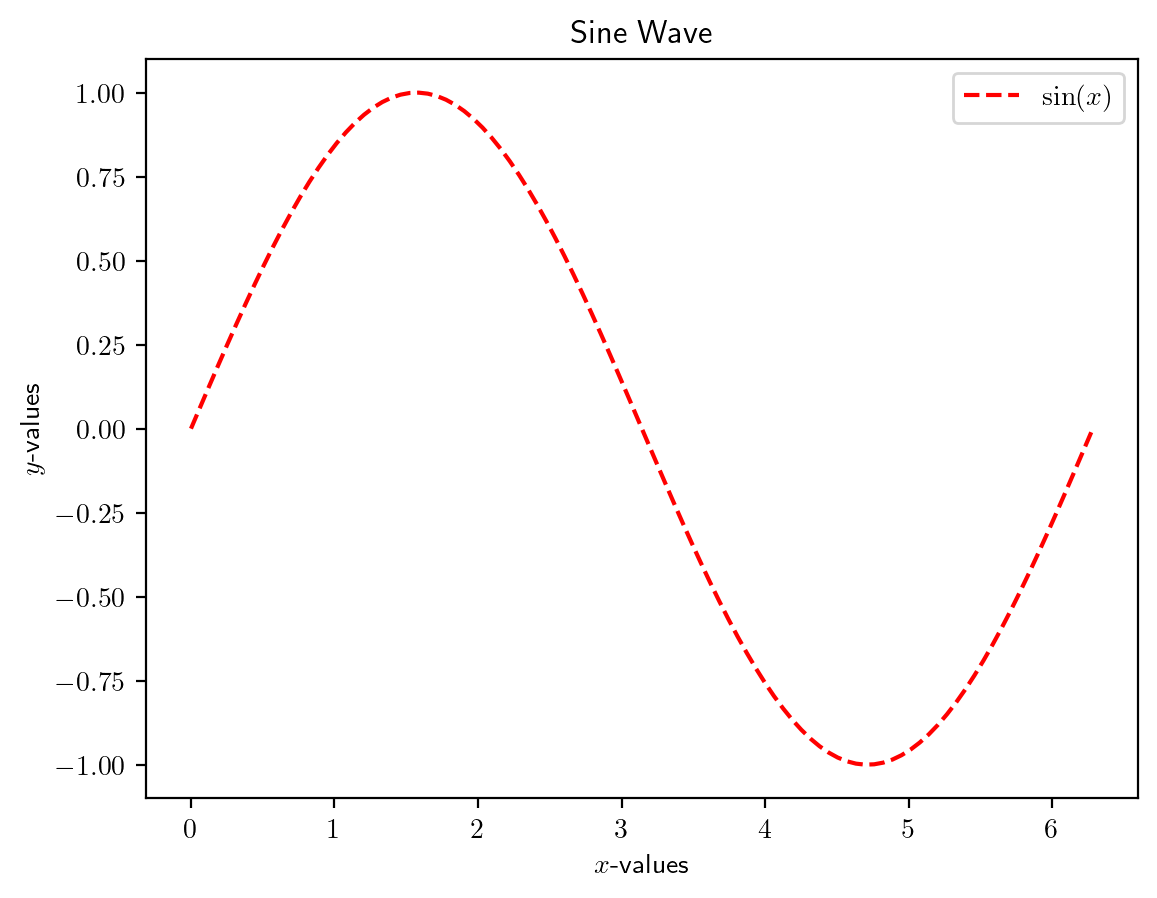

In [72]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y, color='r', linestyle='--', label=r'$\sin(x)$') # line plot
#plt.scatter(x, y) # scatter plot

plt.title('Sine Wave')
plt.xlabel(r'$x$-values')
plt.ylabel(r'$y$-values')
plt.legend()
plt.show()

### <a id='toc2_10_1_'></a>[Numpy: efficienza in tempo](#toc0_)

In [73]:
lista = list(np.arange(100000))
np_array = np.arange(100000)

Usiamo il "magic command" di Jupyter `%time` per cronometrare l'esecuzione di una cella

In [74]:
%time lista = [i+2 for i in lista]

CPU times: user 10.8 ms, sys: 3.37 ms, total: 14.2 ms
Wall time: 15.4 ms


In [75]:
%time np_array += 2

CPU times: user 238 µs, sys: 76 µs, total: 314 µs
Wall time: 321 µs


In [76]:
print(f'Numpy è {np.round(14000/241)} volte più veloce di una list comprehension in questo esempio')

Numpy è 58.0 volte più veloce di una list comprehension in questo esempio


### <a id='toc2_10_2_'></a>[Numpy: efficienza in memoria](#toc0_)

Importiamo una libreria che ci dice lo spazio occupato da un certo oggetto in memoria

In [77]:
from pympler.asizeof import asizeof

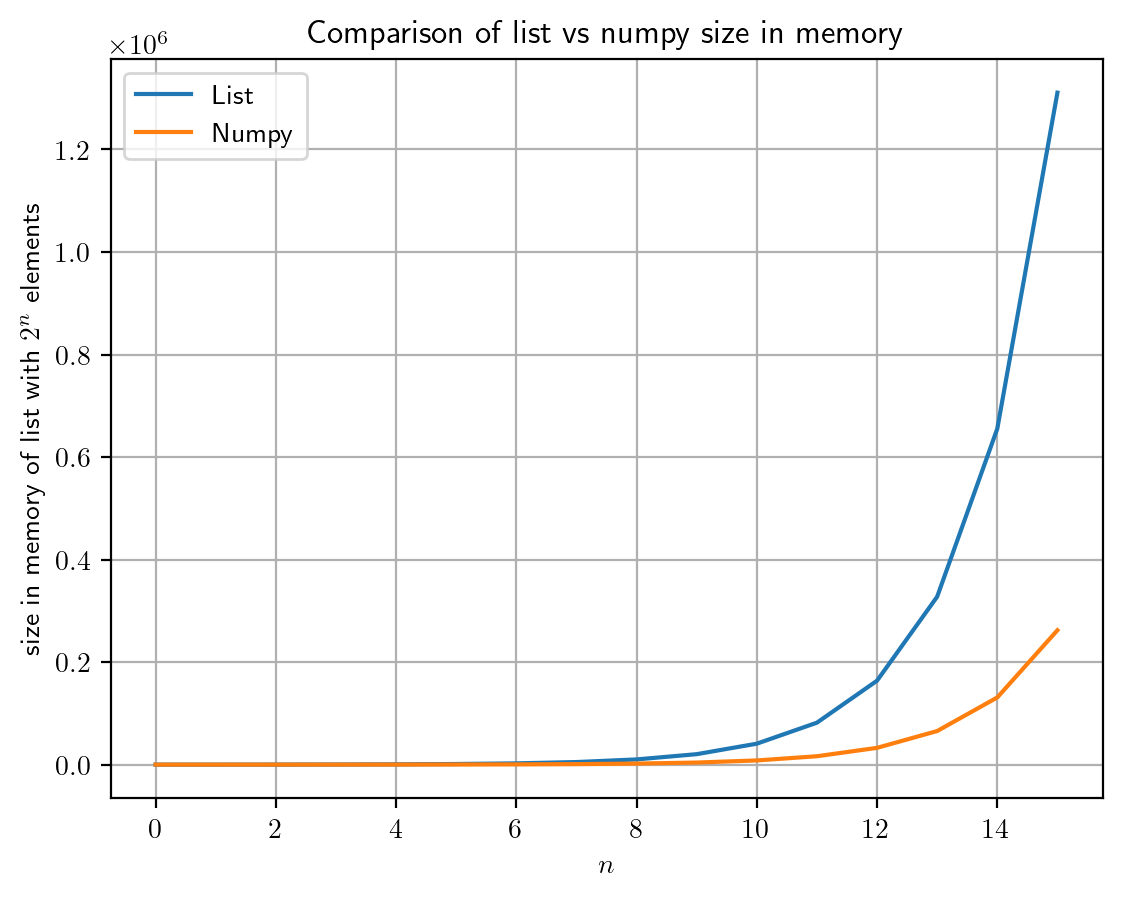

In [78]:
N_trials = 16
lengths = np.zeros(shape=(N_trials,2))

for i in range(N_trials):
    data = list(np.arange(2**i))
    data_np = np.arange(2**i)
    lengths[i,0] = asizeof(data)
    lengths[i,1] = asizeof(data_np)

plt.plot(lengths[:,0], label='List')
plt.plot(lengths[:,1], label='Numpy')
plt.legend()
plt.grid()
plt.title('Comparison of list vs numpy size in memory')
plt.xlabel(r'$n$')
plt.ylabel(r'size in memory of list with $2^n$ elements')
plt.show()

## <a id='toc2_11_'></a>[Esempio probabilistico: Monty Hall](#toc0_)

Avete davanti a voi 3 scatole.
In due di esse c'è una capra, nell'altra c'è un'automobile.

![](./assets/monty_1.png)

Scegliete casualmente fra il pacco A, B, C, senza aprirlo.
Dopo aver scelto il pacco, l'organizzatore del gioco, *che conosce dentro quale pacco c'è l'automobile*, apre un pacco in cui c'è una capra e vi chiede se volete tenere il vostro pacco o cambiarlo.

Cosa fate?

Intuitivamente, verrebbe da dire che tenere il pacco o cambiarlo è una scelta equivalente dal punto di vista statistico.
Se tengo il pacco iniziale ho il 50% di possibilità di vincere, se lo cambio ho il 50%, no? 
In realtà questo è uno di quei casi in cui l'intuito fallisce in maniera piuttosto clamorosa.

Difatti, tenendo il pacco iniziale la vostra probabilità di vittoria è di 1 su 3. Cambiando il pacco, la vostra probabilità raddoppia, diventando 2 su 3!

Questo problema è noto come **paradosso di Monty Hall** o **paradosso della scatola di Bertrand** e fu presentato dal matematico francese nel suo lavoro “Calcolo delle probabilità”, del 1889.

Usiamo Python per fare una simulazione Monte Carlo!

In [79]:
def simulazione_singola(scelta_pacco):

    scelta = ['perdi 1', 'perdi 2', 'vinci']
    estrazione = np.random.choice(scelta, replace=False, size=3)
    giocatore = estrazione[0]

    score = 0

    if scelta_pacco == 'conferma':
        # non modifico lo stato del giocatore
        pass

    elif scelta_pacco == 'cambia':
        # il presentatore elimina uno dei pacchi perdenti e il giocatore cambia la scelta
        if (estrazione[1] == 'perdi 1') or (estrazione[1] == 'perdi 2'):
            giocatore = estrazione[2]
        elif (estrazione[2] == 'perdi 1') or (estrazione[2] == 'perdi 2'):
            giocatore = estrazione[1]

    # controllo la scelta del giocare e aggiorno lo score
    if giocatore == 'vinci':
        score += 1
  
    return score

def simulazioni_multiple(n_cicli):

    score_tengo = 0
    score_cambio = 0
  
    for i in range(n_cicli):
        score_tengo += simulazione_singola(scelta_pacco='conferma')
        score_cambio += simulazione_singola(scelta_pacco='cambia')
  
    return score_tengo, score_cambio

In [80]:
N_trials = 10**4
score_tengo_sim, score_cambio_sim = simulazioni_multiple(n_cicli=N_trials)

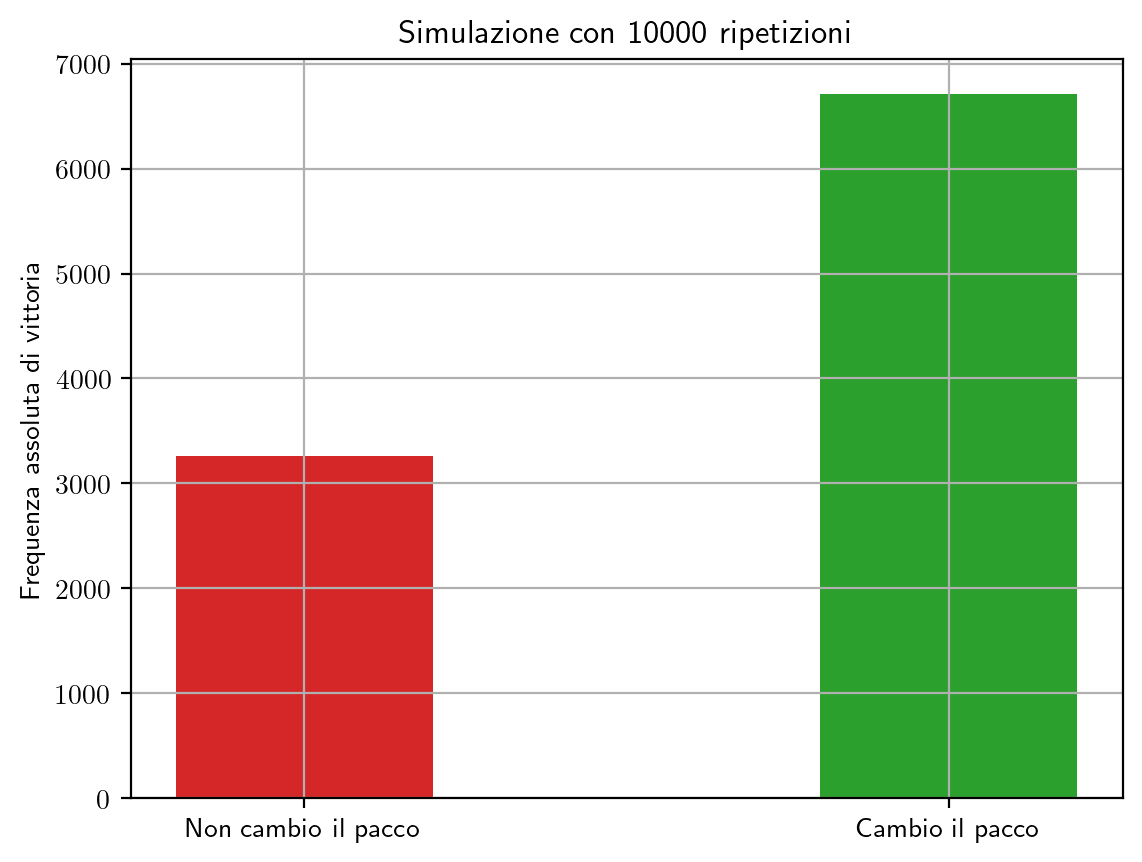

In [81]:
plt.bar(0, score_tengo_sim, width=0.2, color='C3')
plt.bar(0.5, score_cambio_sim, width=0.2, color='C2')
plt.grid()
plt.xticks([0, 0.5], ['Non cambio il pacco', 'Cambio il pacco'])
plt.ylabel('Frequenza assoluta di vittoria')
plt.title(f'Simulazione con {N_trials} ripetizioni')
plt.show()

Se non siete convinti (come darvi torto), provate a vedere la situazione in questo modo. L'automobile è nel pacco A (voi non lo sapete) e scegliete un pacco in maniera casuale:

- scegliete il pacco A. L'organizzatore apre il pacco B o C, voi cambiate pacco e perdete
- scegliete il pacco B. L'organizzatore apre per forza il pacco C (nell'altro c'è il premio), voi cambiate il pacco e vincete
- scegliete il pacco C. L'organizzatore apre per forza il pacco B (nell'altro c'è il premio), voi cambiate il pacco e vincete.

Cambiando il pacco, avete 2 possibilità di vittoria su 3.
Non cambiandolo, avete 1 possibilità di vittoria su 3.

![](./assets/monty_2.png)

A volte l'intuito ci tradisce!

Credits: [Andrea Palladino](https://www.linkedin.com/in/andrea-palladino-22476a110)

## <a id='toc2_12_'></a>[Esempio statistico](#toc0_)

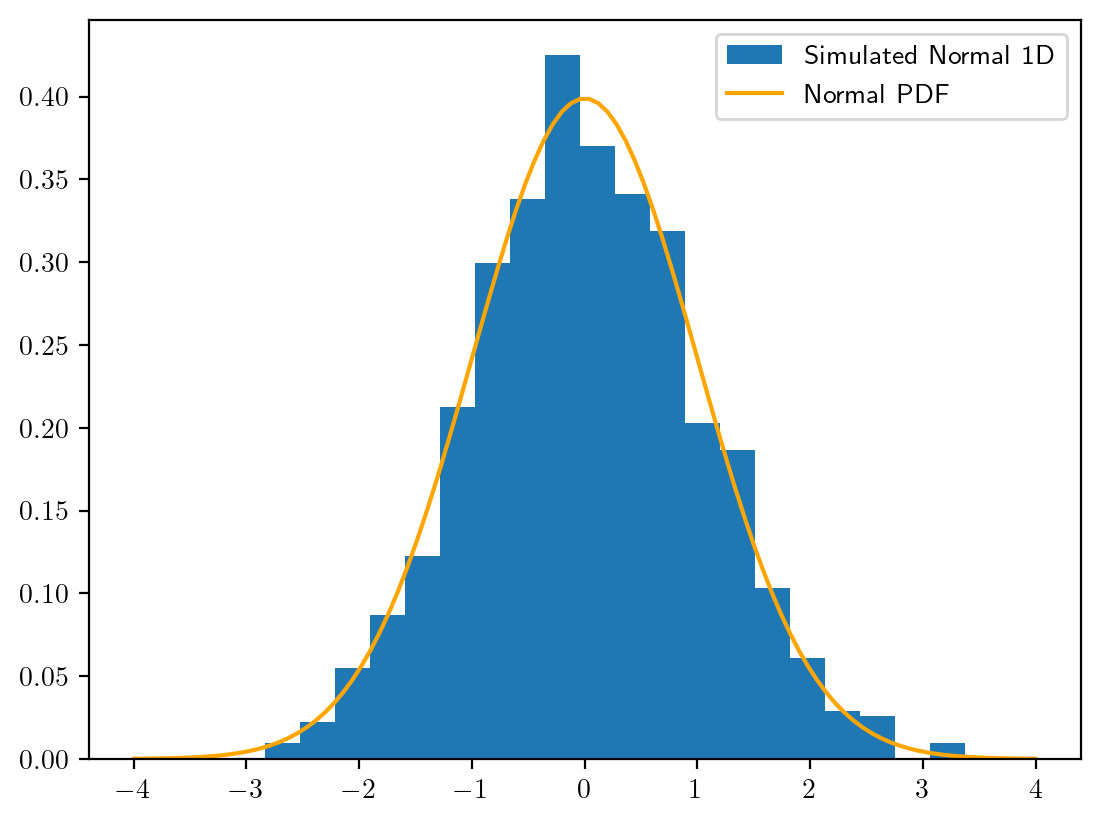

In [82]:
from scipy.stats import norm

n = 1000
normal_sample = np.random.normal(loc = 0, scale = 1, size = (n,))  # Array con valori random
plt.hist(normal_sample, density = True, label = 'Simulated Normal 1D', bins = 20)

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0,1), 'orange', label = 'Normal PDF' )

plt.legend()
# plt.savefig('plotinutile.pdf') # prima di plt.show()
plt.show()

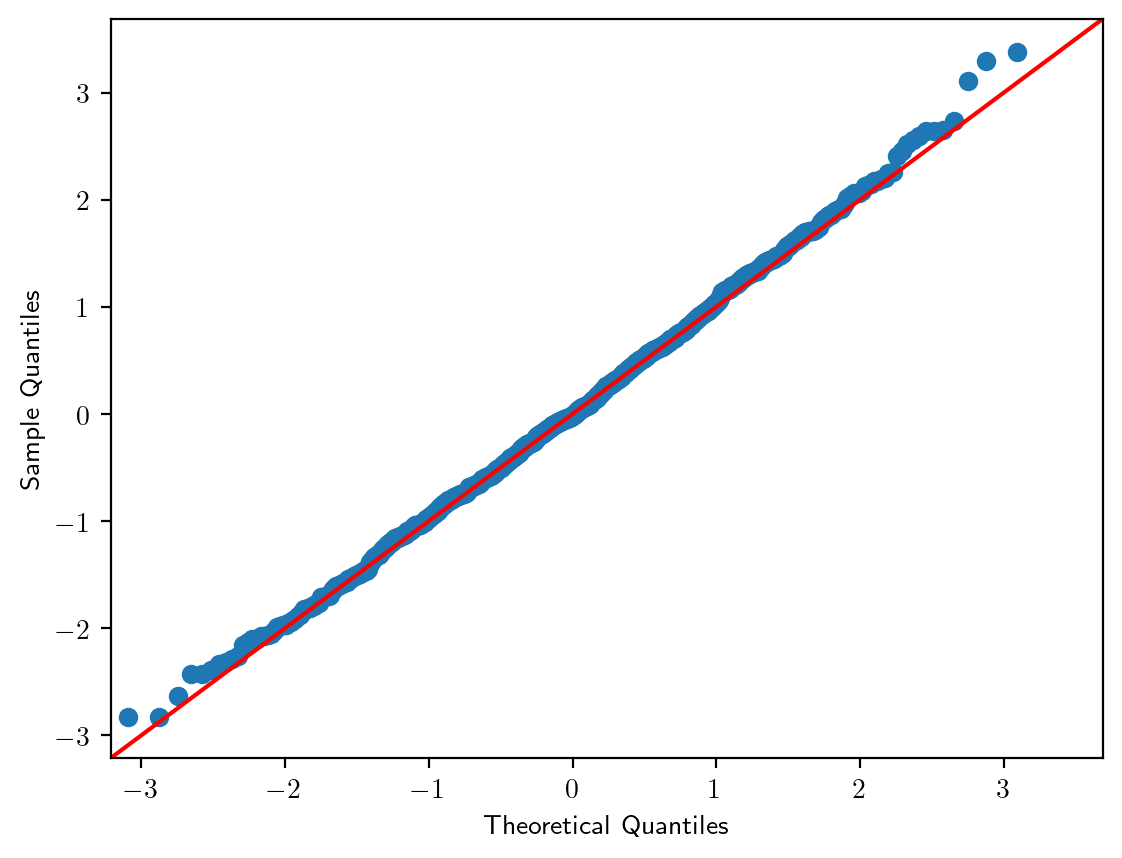

In [83]:
import statsmodels.api as sm

sm.qqplot(normal_sample, line='45')
plt.show()

In [84]:
normal_sample_multi = np.random.multivariate_normal(mean=np.zeros(n), cov=np.eye(n))

In [85]:
from scipy.stats import shapiro, bartlett, ttest_ind

In [86]:
shapiro(normal_sample) # p-value > 0.05 => don't reject H0 => gaussian sample

ShapiroResult(statistic=0.9985450506210327, pvalue=0.5843130946159363)

In [87]:
bartlett(normal_sample, normal_sample_multi) # p-value > 0.05 => don't reject H0 => same covariance

BartlettResult(statistic=0.5658189905499462, pvalue=0.4519251379935295)

In [88]:
ttest_ind(normal_sample, normal_sample_multi, equal_var=True) # assuming same covariance, p-value > 0.05 => don't reject H0 => same mean

Ttest_indResult(statistic=0.3487784022437504, pvalue=0.7272924279265431)

## <a id='toc2_13_'></a>[Esempio calcolistico](#toc0_)



Il modello Suscettibile-Infetto-Risultante (SIR) è un modello matematico utilizzato per studiare la diffusione delle malattie infettive in una popolazione. Esso divide la popolazione in tre compartimenti: Suscettibili ($S$), Infetti ($I$), e Guariti ($R$). Il modello è descritto da un sistema di equazioni differenziali:

\begin{align}
    \frac{dS}{dt} &= - \frac{\beta \cdot S \cdot I}{N} \\
    \frac{dI}{dt} &= \frac{\beta \cdot S \cdot I}{N} - \gamma \cdot I \\
    \frac{dR}{dt} &= \gamma \cdot I
\end{align}

Dove:
- $S$ è il numero di individui suscettibili.
- $I$ è il numero di individui infetti.
- $R$ è il numero di individui guariti.
- $N$ è il numero totale di individui.
- $\beta$ è il tasso di trasmissione.
- $\gamma$ è il tasso di guarigione.

e si può dimostrare che:

$$
R_0 = \beta/\gamma
$$

Scriviamo le nostre funzioni di aiuto

In [89]:
from scipy.integrate import odeint

# SIR model differential equations.
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

# SIR model with time-varying beta and gamma
def sir_model_varying(y, t, beta_func, gamma_func, N):
    S, I, R = y
    beta = beta_func(t)
    gamma = gamma_func(t)
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

def plot_traj(trajectories, title):
    x1 = trajectories[:,0]
    x2 = trajectories[:,1]
    x3 = trajectories[:,2]
    s = plt.plot(x1, linewidth = 1, label = 'Susceptible')
    i = plt.plot(x2, linewidth = 1, label = 'Infected')
    r = plt.plot(x3, linewidth = 1, label = 'Removed')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(title)

Inserire i dati!

In [90]:
I0 = 1
R0 = 0
N = 1000
S0 = N - I0 - R0
y0 = S0, I0, R0

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

Eseguire la simulazione!

In [91]:
beta_fixed = 0.3
gamma_fixed = 0.1
ret_fixed = odeint(sir_model, y0, t, args=(beta_fixed, gamma_fixed, N))
S_fixed, I_fixed, R_fixed = ret_fixed.T

Eseguire una seconda simulazione!

In [92]:
# Function for varying beta and gamma
def beta_func(t):
    return 0.4 if t < 20 else 0.1  # Example: decrease beta after t=50

def gamma_func(t):
    return 0.1 if t < 50 else 0.4  # Example: decrease gamma after t=50

ret_varying = odeint(sir_model_varying, y0, t, args=(beta_func, gamma_func, N))
S_varying, I_varying, R_varying = ret_varying.T

Visualizzare!

![](./assets/meatballs.gif)

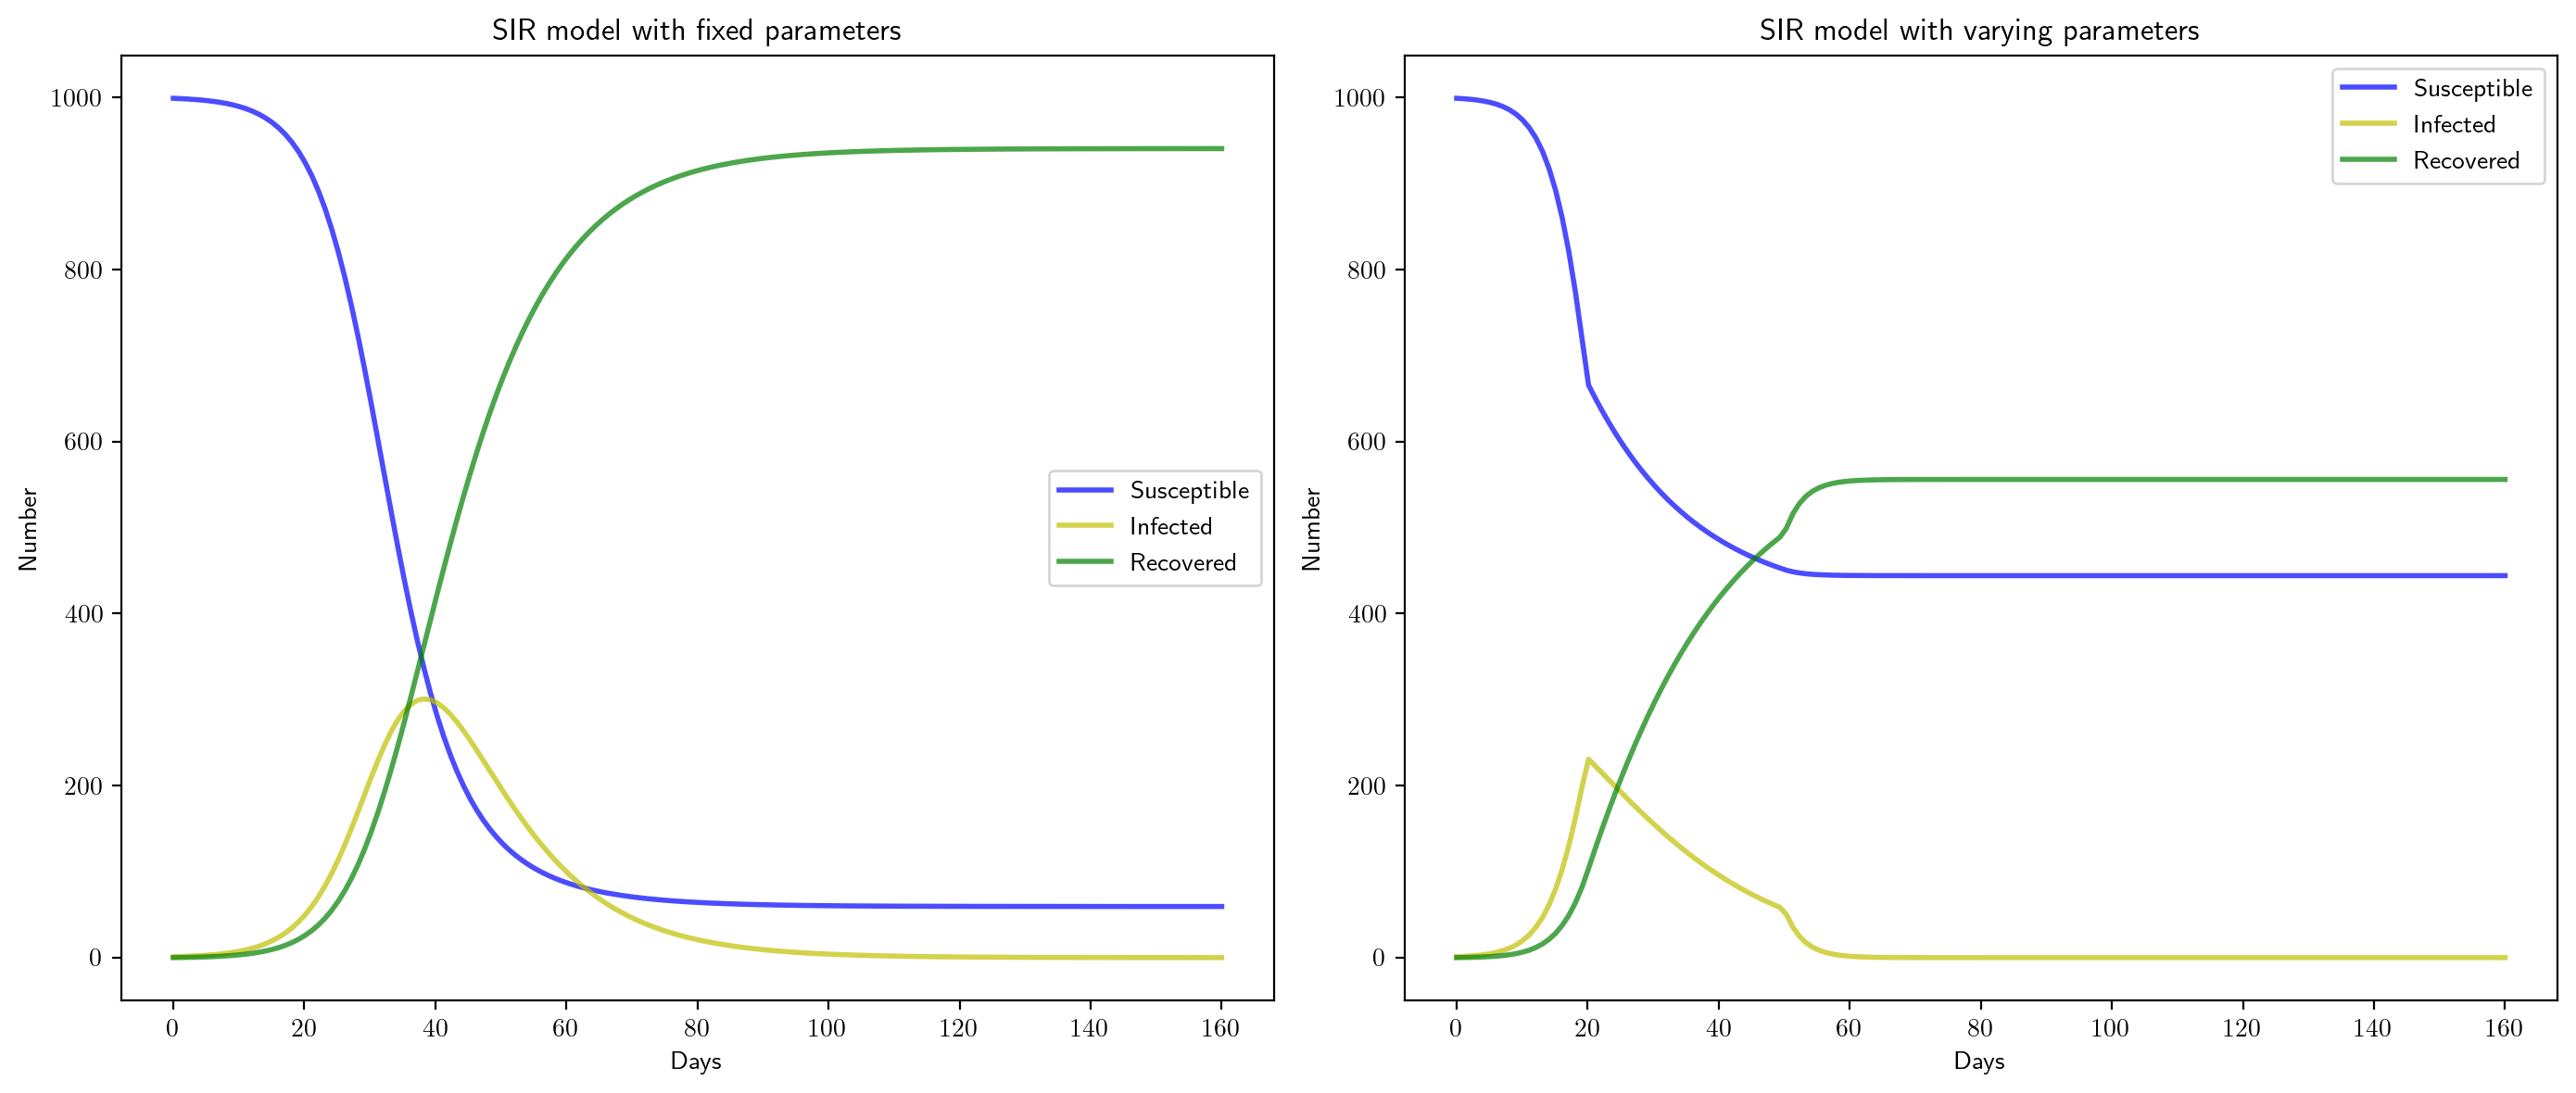

In [93]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot with fixed parameters
ax1.plot(t, S_fixed, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax1.plot(t, I_fixed, 'y', alpha=0.7, linewidth=2, label='Infected')
ax1.plot(t, R_fixed, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax1.set_xlabel('Days')
ax1.set_ylabel('Number')
ax1.set_title('SIR model with fixed parameters')
ax1.legend()

# Plot with varying parameters
ax2.plot(t, S_varying, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax2.plot(t, I_varying, 'y', alpha=0.7, linewidth=2, label='Infected')
ax2.plot(t, R_varying, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax2.set_xlabel('Days')
ax2.set_ylabel('Number')
ax2.set_title('SIR model with varying parameters')
ax2.legend()

# Display the graphs
plt.tight_layout()
plt.show()

# <a id='toc3_'></a>[Pandas](#toc0_)


In [68]:
import pandas as pd

![](assets/data.gif)

## <a id='toc3_1_'></a>[Leggere dei dati](#toc0_)

Possiamo tipicamente leggere file da CSV, Excel, oppure crearli direttamente:

- da CSV: `df = pd.read_csv('data.csv')`
- da Excel: `df = pd.read_excel('data.xlsx')`
- da dizionario creato al momento:
```python
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
```

In [69]:
!ls -R

assets          data            lezione-4.html  lezione-4.ipynb

./assets:
data.gif         legendary.gif    monty_2.png
dont-do-this.gif meatballs.gif    numpy.jpeg
get-started.gif  monty_1.png      py-course.jpeg

./data:
boella.jpg       edp-trolleys.csv pokemon.csv


## <a id='toc3_2_'></a>[Esempio applicativo 1: Abandoned Shopping Trolleys in Bristol rivers](#toc0_)

Un dataset particolare: indagine annuale sul numero di carrelli dei supermercati abbandonati nei fiumi di Bristol dal 2005.

Il file a cui rimanda la [pagina ufficiale del governo britannico](https://www.data.gov.uk/dataset/452bee2c-28ea-4a2f-8005-16b9afdd8ba9/abandoned-shopping-trolleys-in-bristol-rivers) è purtroppo irraggiungibile, ma possiamo ingegnarci in due modi:

1. usare [archive.org](https://web.archive.org/web/20150925020745/http://www.bristol.gov.uk/776/6/) per recuperare l'ultima versione disponibile online
2. cercando su internet si trova un [repository](https://github.com/tomwhite/datavision-code/blob/master/22-shopping-trolleys-in-bristol-rivers/data/edp-trolleys-clean.csv) con la versione addirittura già pulita dei dati

Si consiglia la consultazione di questo [subreddit](https://www.reddit.com/r/trolliesgonewild/).

In [70]:
df = pd.read_csv('data/edp-trolleys.csv')

### <a id='toc3_2_1_'></a>[Esplorazione di un dataframe](#toc0_)

In [71]:
df.head(3)

River  Total number of trolleys  Survey 2006  \
0              Avon (New Cut)                         8           19   
1  Avon (Temple Meads-Conham)                         8           13   
2                    Begbrook                         0            1   

   Survey 2007  Survey 2008  Survey 2009  Survey 2010  
0           11           13           22            6  
1           11            0            8            1  
2            0            0            0            0

In [72]:
df.tail(3)

River  Total number of trolleys  Survey 2006  Survey 2007  \
14              Malago                        20            4            8   
15  Pigeonhouse stream                        15            2            5   
16                Trym                         1            2            0   

    Survey 2008  Survey 2009  Survey 2010  
14            3            1            3  
15           17            1            4  
16            2            0            1

In [73]:
type(df)

pandas.core.frame.DataFrame

Col comando [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) si possono rimuovere specifiche righe o specifiche colonne.

In [74]:
df.drop(columns = ['Total number of trolleys']).head()

River  Survey 2006  Survey 2007  Survey 2008  \
0              Avon (New Cut)           19           11           13   
1  Avon (Temple Meads-Conham)           13           11            0   
2                    Begbrook            1            0            0   
3               Boiling Wells            0            0            0   
4           Brislington Brook           58           22           20   

   Survey 2009  Survey 2010  
0           22            6  
1            8            1  
2            0            0  
3            0            0  
4           11            9

Attenzione però che questo non modifica il dataframe! Ritorna solamente una versione modificata dello stesso, ma non viene aggiornato l'originale. Per modificare l'originale ci sono due modi:

- `df.drop(columns = ['Total number of trolleys'], inplace = True)`
- `df = df.drop(columns = ['Total number of trolleys'])`

Il secondo è solitamente il consigliato per chiarezza.

In [75]:
df = df.drop(columns = ['Total number of trolleys'])

In [76]:
df.describe()

Survey 2006  Survey 2007  Survey 2008  Survey 2009  Survey 2010
count    17.000000    17.000000    17.000000    17.000000    17.000000
mean      9.470588     6.823529     8.588235     6.352941     2.941176
std      17.713405    12.166734    21.201588    15.479588     4.205214
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000     0.000000     0.000000
50%       2.000000     3.000000     1.000000     0.000000     1.000000
75%       4.000000     8.000000     3.000000     2.000000     4.000000
max      58.000000    48.000000    87.000000    62.000000    14.000000

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   River        17 non-null     object
 1   Survey 2006  17 non-null     int64 
 2   Survey 2007  17 non-null     int64 
 3   Survey 2008  17 non-null     int64 
 4   Survey 2009  17 non-null     int64 
 5   Survey 2010  17 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 944.0+ bytes


In [78]:
df = df.set_index('River')
df

Survey 2006  Survey 2007  Survey 2008  \
River                                                               
Avon (New Cut)                       19           11           13   
Avon (Temple Meads-Conham)           13           11            0   
Begbrook                              1            0            0   
Boiling Wells                         0            0            0   
Brislington Brook                    58           22           20   
Colliters Brook                       2            0            0   
Coombe Brook                          2            0            0   
Cranbrook                             0            0            0   
Fishponds Brook                       2            3            0   
Floating Harbour                      0            0            0   
Frome                                51           48           87   
Hazel Brook                           2            4            2   
Henry Sleed Stream                    0            0            1   
Horfield Brook                        3            4            1   
Malago                                4            8            3   
Pigeonhouse stream                    2            5           17   
Trym                                  2            0            2   

                            Survey 2009  Survey 2010  
River                                                 
Avon (New Cut)                       22            6  
Avon (Temple Meads-Conham)            8            1  
Begbrook                              0            0  
Boiling Wells                         0            0  
Brislington Brook                    11            9  
Colliters Brook                       0            3  
Coombe Brook                          0            0  
Cranbrook                             0            0  
Fishponds Brook                       0            0  
Floating Harbour                      0            0  
Frome                                62           14  
Hazel Brook                           2            9  
Henry Sleed Stream                    0            0  
Horfield Brook                        1            0  
Malago                                1            3  
Pigeonhouse stream                    1            4  
Trym                                  0            1

### <a id='toc3_2_2_'></a>[Selezionare parti di un dataframe (indexing)](#toc0_)

`loc` e `iloc` sono due funzioni per selezionare dati da un DataFrame. La differenza tra i due metodi risiede nel tipo di indice che utilizzano per selezionare i dati:

1. `loc`: sta per "location" ed è basato sulle etichette. Con `loc`, selezioni righe (e colonne) basandoti sulle loro etichette. Le etichette possono essere nomi (come le intestazioni delle colonne in un DataFrame) o possono essere indici specifici quando si tratta di righe.

In [79]:
df.loc['Begbrook'] 

Survey 2006    1
Survey 2007    0
Survey 2008    0
Survey 2009    0
Survey 2010    0
Name: Begbrook, dtype: int64

In [80]:
df.loc['Begbrook','Survey 2006']

1

In [81]:
df.loc['Begbrook':'Cranbrook', :]

Survey 2006  Survey 2007  Survey 2008  Survey 2009  \
River                                                                   
Begbrook                     1            0            0            0   
Boiling Wells                0            0            0            0   
Brislington Brook           58           22           20           11   
Colliters Brook              2            0            0            0   
Coombe Brook                 2            0            0            0   
Cranbrook                    0            0            0            0   

                   Survey 2010  
River                           
Begbrook                     0  
Boiling Wells                0  
Brislington Brook            9  
Colliters Brook              3  
Coombe Brook                 0  
Cranbrook                    0

In [82]:
df.loc['Begbrook':'Cranbrook', 'Survey 2008']

River
Begbrook              0
Boiling Wells         0
Brislington Brook    20
Colliters Brook       0
Coombe Brook          0
Cranbrook             0
Name: Survey 2008, dtype: int64

2. `iloc`: sta per "integer location" ed è basato sugli indici interi. Si selezionano righe (e colonne) per la loro posizione numerica nel DataFrame.

`iloc` esclude l'ultimo elemento in un intervallo (come nella maggior parte degli indici basati su zero in Python), mentre `loc` include entrambi gli estremi dell'intervallo.

In [109]:
df[2:8] # solo righe

Survey 2006  Survey 2007  Survey 2008  Survey 2009  \
River                                                                   
Begbrook                     1            0            0            0   
Boiling Wells                0            0            0            0   
Brislington Brook           58           22           20           11   
Colliters Brook              2            0            0            0   
Coombe Brook                 2            0            0            0   
Cranbrook                    0            0            0            0   

                   Survey 2010  
River                           
Begbrook                     0  
Boiling Wells                0  
Brislington Brook            9  
Colliters Brook              3  
Coombe Brook                 0  
Cranbrook                    0

Avrei dovuto scrivere `df[2:8, :]` per dire che volevo tutte le colonne ma **di default, se tutti gli ultimi argomenti dell'indexing sono dei `:`, posso ometterli**.

In [110]:
df.iloc[2:8, 1:3] # righe e colonne

Survey 2007  Survey 2008
River                                      
Begbrook                     0            0
Boiling Wells                0            0
Brislington Brook           22           20
Colliters Brook              0            0
Coombe Brook                 0            0
Cranbrook                    0            0

NON si mischiano le due cose!

### <a id='toc3_2_3_'></a>[Indexing basato su condizioni](#toc0_)

In [111]:
mean_2006 = df['Survey 2006'].mean()
mean_2006

9.470588235294118

In [112]:
df[df['Survey 2006'] > mean_2006]

Survey 2006  Survey 2007  Survey 2008  \
River                                                               
Avon (New Cut)                       19           11           13   
Avon (Temple Meads-Conham)           13           11            0   
Brislington Brook                    58           22           20   
Frome                                51           48           87   

                            Survey 2009  Survey 2010  
River                                                 
Avon (New Cut)                       22            6  
Avon (Temple Meads-Conham)            8            1  
Brislington Brook                    11            9  
Frome                                62           14

### <a id='toc3_2_4_'></a>[Il mattoncino base di Pandas: le Series](#toc0_)

In [113]:
y_2006 = df['Survey 2006']
y_2006

River
Avon (New Cut)                19
Avon (Temple Meads-Conham)    13
Begbrook                       1
Boiling Wells                  0
Brislington Brook             58
Colliters Brook                2
Coombe Brook                   2
Cranbrook                      0
Fishponds Brook                2
Floating Harbour               0
Frome                         51
Hazel Brook                    2
Henry Sleed Stream             0
Horfield Brook                 3
Malago                         4
Pigeonhouse stream             2
Trym                           2
Name: Survey 2006, dtype: int64

In [114]:
type(y_2006)

pandas.core.series.Series

In [115]:
y_2006.index

Index(['Avon (New Cut)', 'Avon (Temple Meads-Conham)', 'Begbrook',
       'Boiling Wells', 'Brislington Brook', 'Colliters Brook', 'Coombe Brook',
       'Cranbrook', 'Fishponds Brook', 'Floating Harbour', 'Frome',
       'Hazel Brook', 'Henry Sleed Stream', 'Horfield Brook', 'Malago',
       'Pigeonhouse stream', 'Trym'],
      dtype='object', name='River')

In [116]:
y_2006.values

array([19, 13,  1,  0, 58,  2,  2,  0,  2,  0, 51,  2,  0,  3,  4,  2,  2])

Sotto Pandas ci sono dei Numpy array!

In [117]:
type(y_2006.values)

numpy.ndarray

Cosa c'è di più? Posso sia selezionare con logica di Numpy, sia con l'indice!

In [118]:
y_2006[-1]

2

In [119]:
y_2006['Trym']

2

Per le operazioni si comporta esattamente come il Numpy array che ci sta sotto

In [120]:
y_2006 * 1000

River
Avon (New Cut)                19000
Avon (Temple Meads-Conham)    13000
Begbrook                       1000
Boiling Wells                     0
Brislington Brook             58000
Colliters Brook                2000
Coombe Brook                   2000
Cranbrook                         0
Fishponds Brook                2000
Floating Harbour                  0
Frome                         51000
Hazel Brook                    2000
Henry Sleed Stream                0
Horfield Brook                 3000
Malago                         4000
Pigeonhouse stream             2000
Trym                           2000
Name: Survey 2006, dtype: int64

In più possiede "inclusi" già dei metodi di numpy

In [121]:
y_2006.mean()

9.470588235294118

In [122]:
y_2006.mean() == np.mean(y_2006)

True

In più, ha le funzioni di pandas

In [123]:
y_2006.value_counts()

2     6
0     4
19    1
13    1
1     1
58    1
51    1
3     1
4     1
Name: Survey 2006, dtype: int64

### <a id='toc3_2_5_'></a>[Come Matplotlib è sempre dietro l'angolo](#toc0_)

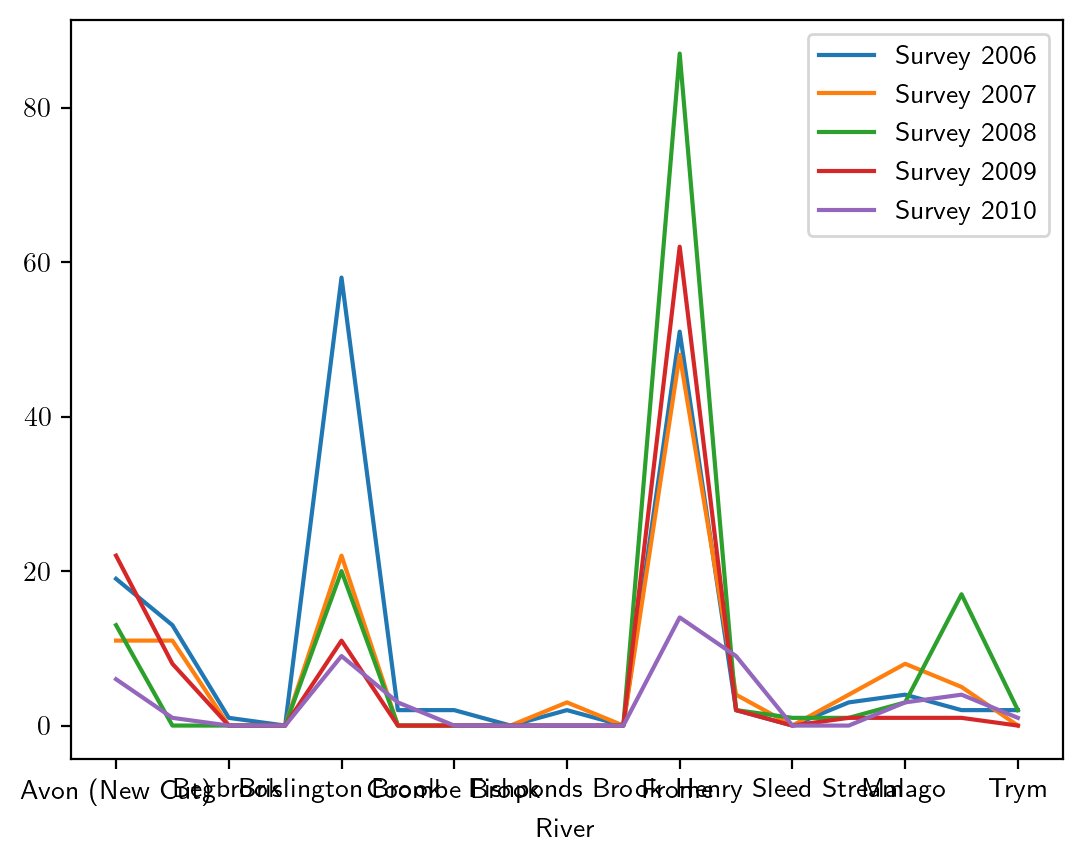

In [124]:
df.plot()
plt.show()

Ci interessa davvero questa quantità?

In [125]:
df_t = df.transpose()
df_t.head()

River        Avon (New Cut)  Avon (Temple Meads-Conham)  Begbrook  \
Survey 2006              19                          13         1   
Survey 2007              11                          11         0   
Survey 2008              13                           0         0   
Survey 2009              22                           8         0   
Survey 2010               6                           1         0   

River        Boiling Wells  Brislington Brook  Colliters Brook  Coombe Brook  \
Survey 2006              0                 58                2             2   
Survey 2007              0                 22                0             0   
Survey 2008              0                 20                0             0   
Survey 2009              0                 11                0             0   
Survey 2010              0                  9                3             0   

River        Cranbrook  Fishponds Brook  Floating Harbour  Frome  Hazel Brook  \
Survey 2006          0                2                 0     51            2   
Survey 2007          0                3                 0     48            4   
Survey 2008          0                0                 0     87            2   
Survey 2009          0                0                 0     62            2   
Survey 2010          0                0                 0     14            9   

River        Henry Sleed Stream  Horfield Brook  Malago  Pigeonhouse stream  \
Survey 2006                   0               3       4                   2   
Survey 2007                   0               4       8                   5   
Survey 2008                   1               1       3                  17   
Survey 2009                   0               1       1                   1   
Survey 2010                   0               0       3                   4   

River        Trym  
Survey 2006     2  
Survey 2007     0  
Survey 2008     2  
Survey 2009     0  
Survey 2010     1

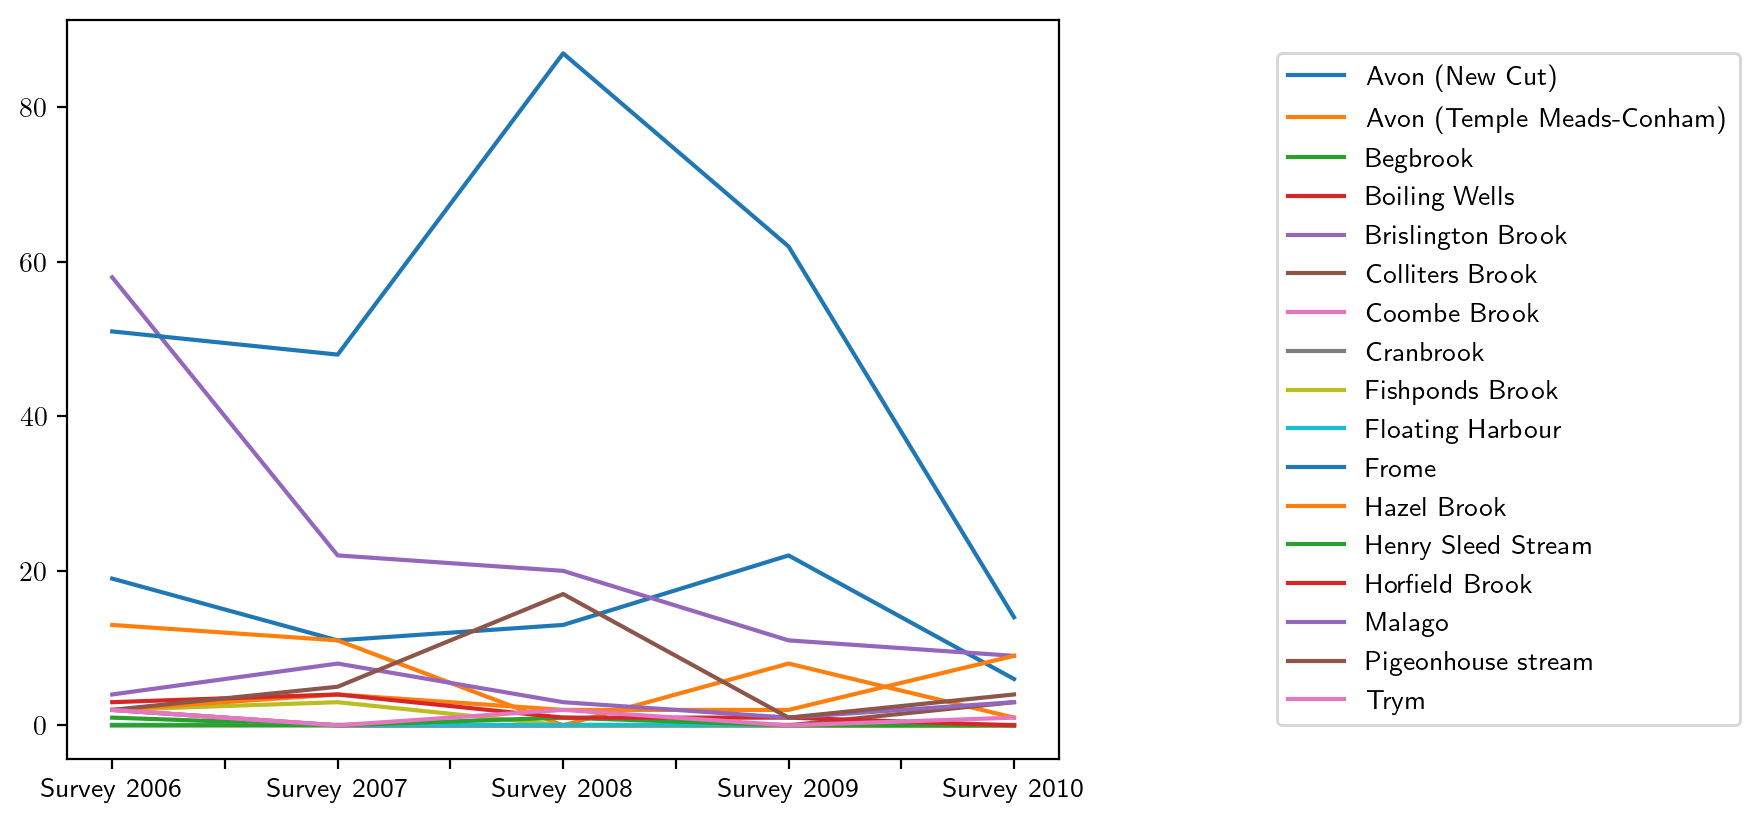

In [126]:
df_t.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

Può avere senso rimuovere i fiumi sempre vuoti per non sporcare il plot

In [127]:
(df_t==0)

River        Avon (New Cut)  Avon (Temple Meads-Conham)  Begbrook  \
Survey 2006           False                       False     False   
Survey 2007           False                       False      True   
Survey 2008           False                        True      True   
Survey 2009           False                       False      True   
Survey 2010           False                       False      True   

River        Boiling Wells  Brislington Brook  Colliters Brook  Coombe Brook  \
Survey 2006           True              False            False         False   
Survey 2007           True              False             True          True   
Survey 2008           True              False             True          True   
Survey 2009           True              False             True          True   
Survey 2010           True              False            False          True   

River        Cranbrook  Fishponds Brook  Floating Harbour  Frome  Hazel Brook  \
Survey 2006       True            False              True  False        False   
Survey 2007       True            False              True  False        False   
Survey 2008       True             True              True  False        False   
Survey 2009       True             True              True  False        False   
Survey 2010       True             True              True  False        False   

River        Henry Sleed Stream  Horfield Brook  Malago  Pigeonhouse stream  \
Survey 2006                True           False   False               False   
Survey 2007                True           False   False               False   
Survey 2008               False           False   False               False   
Survey 2009                True           False   False               False   
Survey 2010                True            True   False               False   

River         Trym  
Survey 2006  False  
Survey 2007   True  
Survey 2008  False  
Survey 2009   True  
Survey 2010  False

In [128]:
(df_t==0).all()

River
Avon (New Cut)                False
Avon (Temple Meads-Conham)    False
Begbrook                      False
Boiling Wells                  True
Brislington Brook             False
Colliters Brook               False
Coombe Brook                  False
Cranbrook                      True
Fishponds Brook               False
Floating Harbour               True
Frome                         False
Hazel Brook                   False
Henry Sleed Stream            False
Horfield Brook                False
Malago                        False
Pigeonhouse stream            False
Trym                          False
dtype: bool

In [129]:
df_no0 = df_t.loc[:,-(df_t==0).all()]

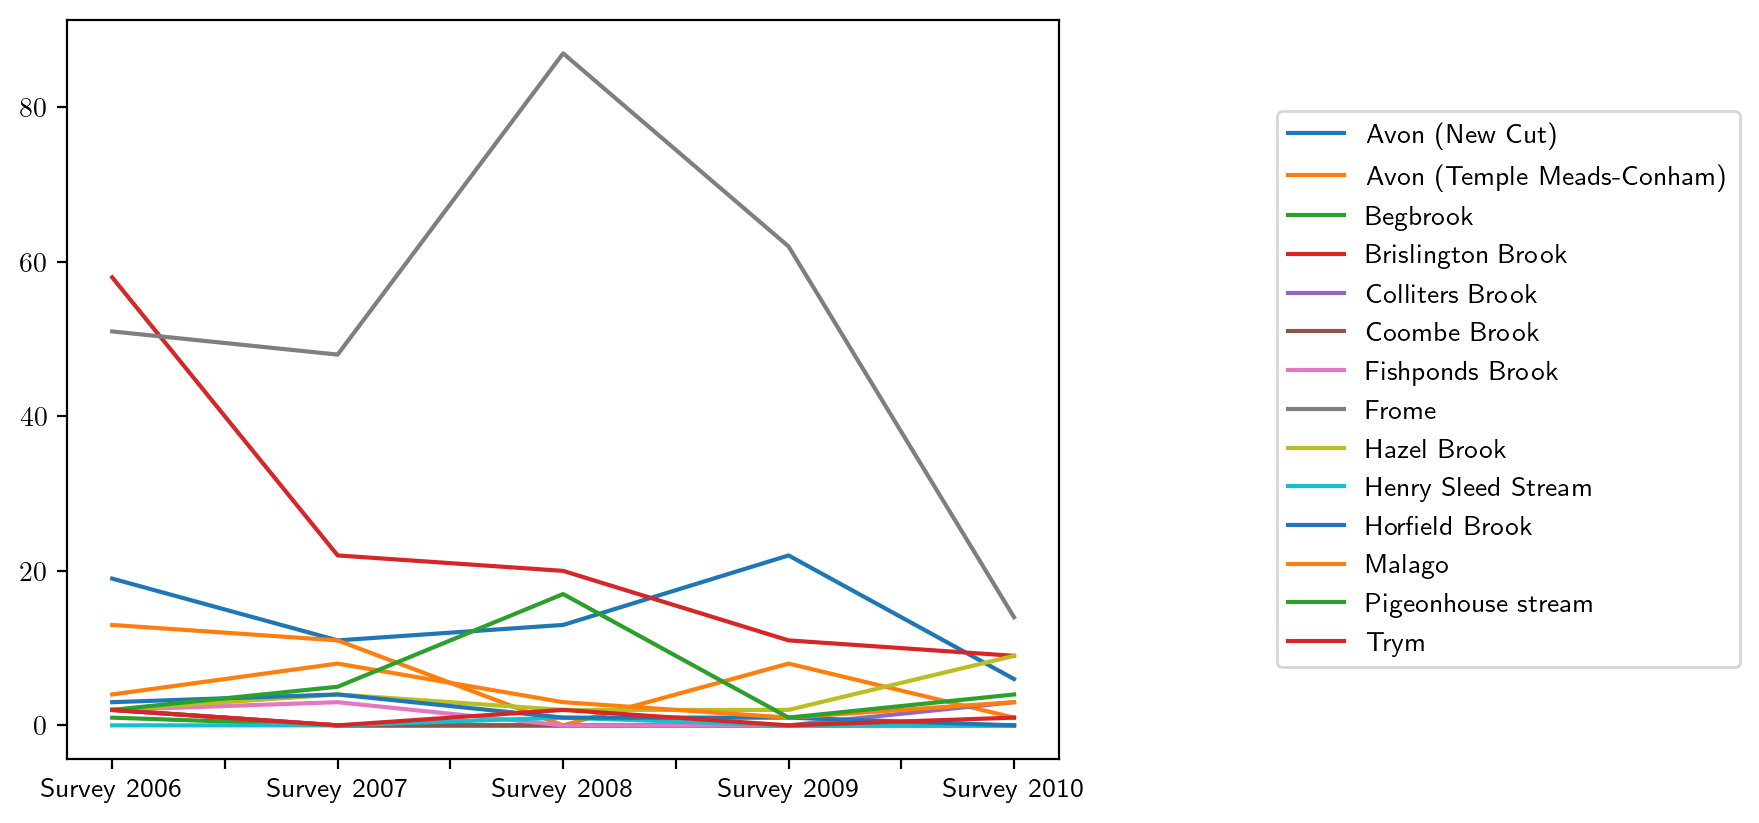

In [130]:
df_no0.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

In [131]:
df_norm = (df_no0 - df_no0.min()) / (df_no0.max() - df_no0.min())

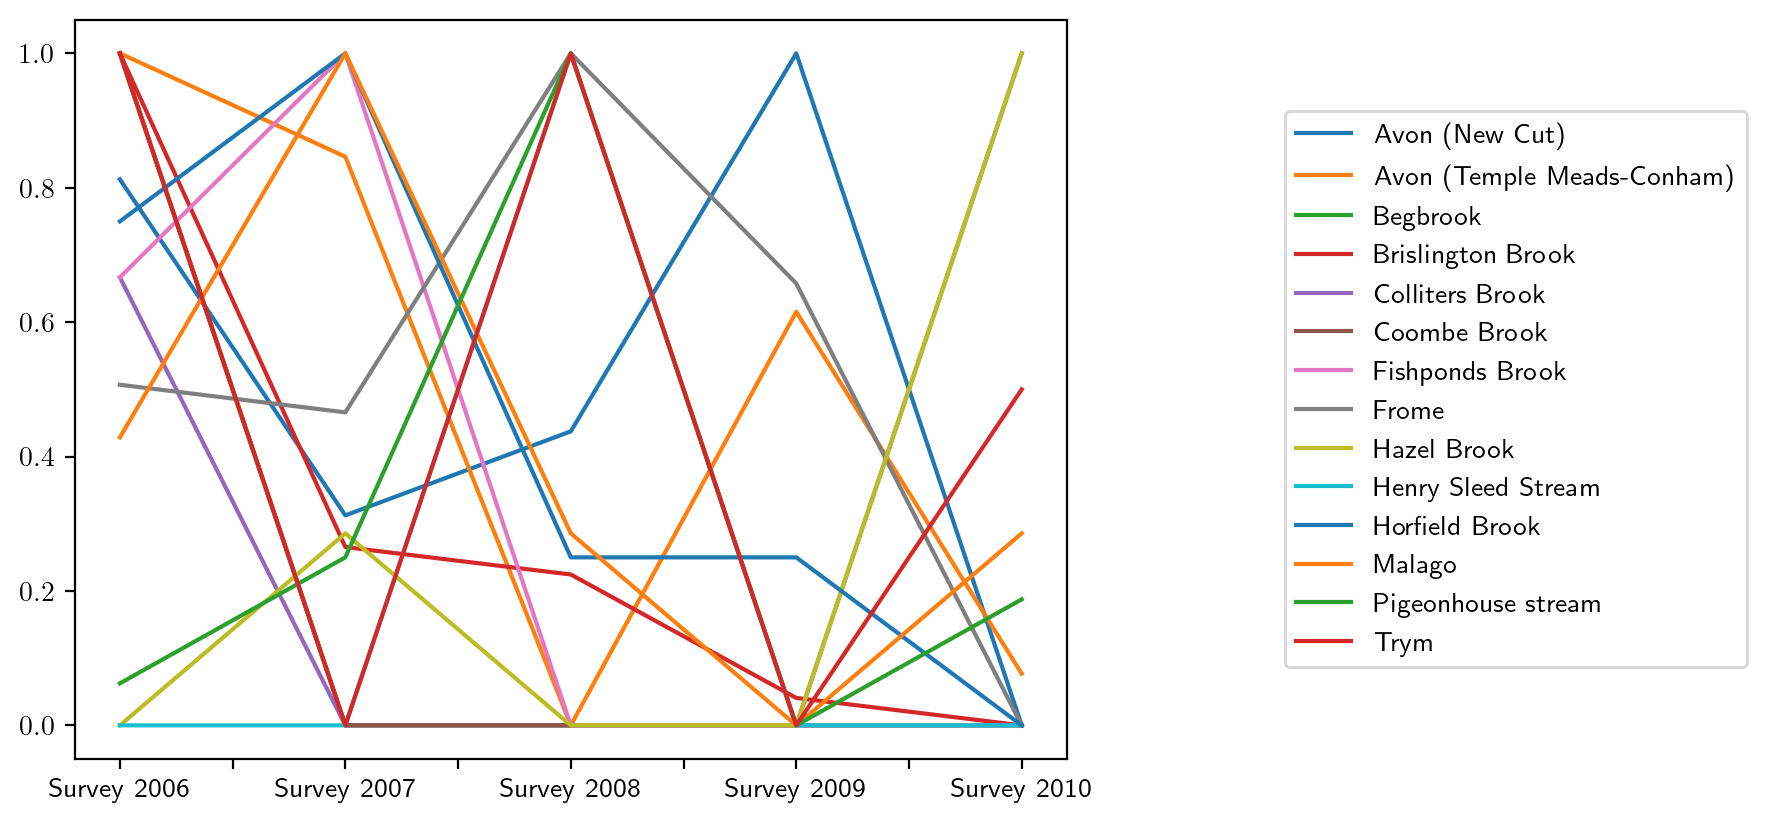

In [132]:
df_norm.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

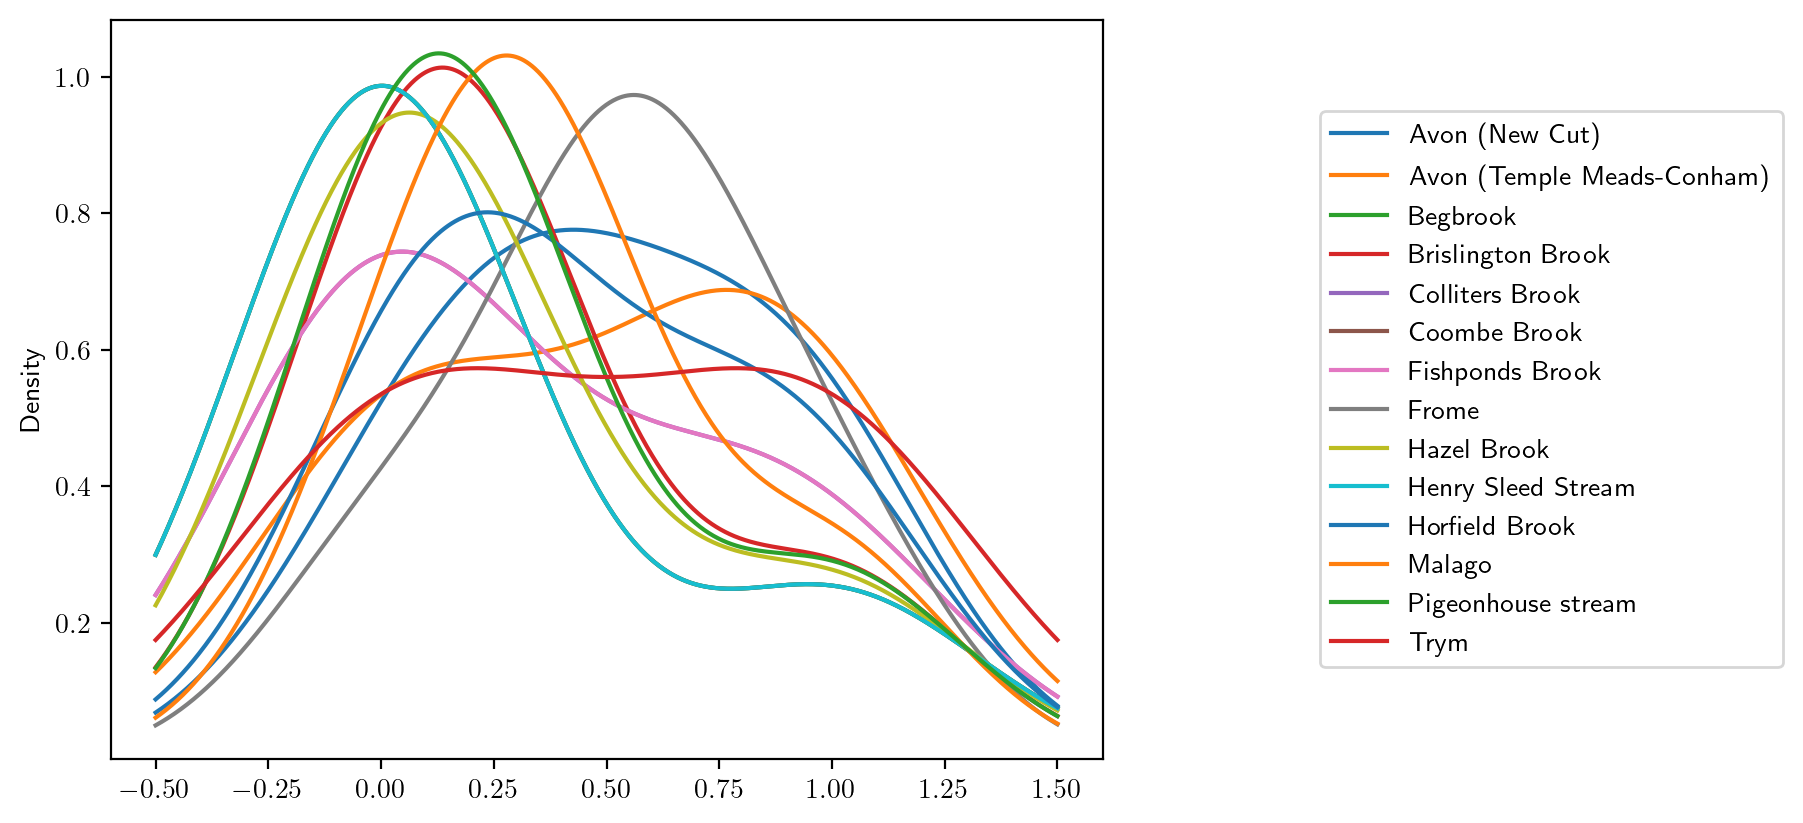

In [133]:
df_norm.plot(kind = 'kde')
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

## <a id='toc3_3_'></a>[Esempio applicativo 2: Pokémon](#toc0_)

In questo esempio avere del *domain knowledge* sarà molto utile.

In [83]:
# pd.set_option('max_columns', None)
df = pd.read_csv('data/pokemon.csv')
df.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

In [84]:
df.shape

(801, 41)

In [85]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

Cosa diavolo sono questi `object`? Lo vedremo poi!

In [86]:
df.describe()

against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000       0.500000      0.500000        1.000000   
50%         1.000000       1.000000      1.000000        1.000000   
75%         1.000000       1.000000      2.000000        1.000000   
max         4.000000       4.000000      4.000000        4.000000   

       against_ghost  against_grass  ...    height_m          hp  \
count     801.000000     801.000000  ...  781.000000  801.000000   
mean        0.985019       1.034020  ...    1.163892   68.958801   
std         0.558256       0.788896  ...    1.080326   26.576015   
min         0.000000       0.250000  ...    0.100000    1.000000   
25%         1.000000       0.500000  ...    0.600000   50.000000   
50%         1.000000       1.000000  ...    1.000000   65.000000   
75%         1.000000       1.000000  ...    1.500000   80.000000   
max         4.000000       4.000000  ...   14.500000  255.000000   

       percentage_male  pokedex_number   sp_attack  sp_defense       speed  \
count       703.000000      801.000000  801.000000  801.000000  801.000000   
mean         55.155761      401.000000   71.305868   70.911361   66.334582   
std          20.261623      231.373075   32.353826   27.942501   28.907662   
min           0.000000        1.000000   10.000000   20.000000    5.000000   
25%          50.000000      201.000000   45.000000   50.000000   45.000000   
50%          50.000000      401.000000   65.000000   66.000000   65.000000   
75%          50.000000      601.000000   91.000000   90.000000   85.000000   
max         100.000000      801.000000  194.000000  230.000000  180.000000   

        weight_kg  generation  is_legendary  
count  781.000000  801.000000    801.000000  
mean    61.378105    3.690387      0.087391  
std    109.354766    1.930420      0.282583  
min      0.100000    1.000000      0.000000  
25%      9.000000    2.000000      0.000000  
50%     27.300000    4.000000      0.000000  
75%     64.800000    5.000000      0.000000  
max    999.900000    7.000000      1.000000  

[8 rows x 34 columns]

In [87]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [88]:
df.loc[df['weight_kg'].isna(), 'name'] # oppure df[df['weight_kg'].isna()].name

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

Sono davvero dei valori mancanti? No! Sono i Pokemon con più forme, quindi non è possibile assegnargli "un peso"

In [89]:
df.loc[df['base_happiness'] >= 140, 'name']

34     Clefairy
35     Clefable
112     Chansey
172      Cleffa
241     Blissey
427     Lopunny
439     Happiny
479        Uxie
480     Mesprit
481       Azelf
Name: name, dtype: object

In [90]:
df.loc[df['base_happiness'] == 0, 'name']

149        Mewtwo
248         Lugia
249         Ho-Oh
381        Kyogre
382       Groudon
383      Rayquaza
385        Deoxys
426       Buneary
482        Dialga
483        Palkia
485     Regigigas
486      Giratina
490       Darkrai
492        Arceus
642      Reshiram
643        Zekrom
645        Kyurem
648      Genesect
715       Xerneas
716       Yveltal
717       Zygarde
771    Type: Null
772      Silvally
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xurkitree
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, dtype: object

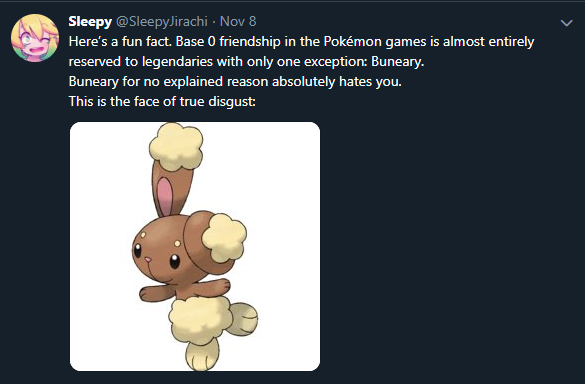

Vi ricordate i famosi `object`? Sono le quantità "categoriche"

In [91]:
df.describe(include='object')

abilities capture_rate   classfication     japanese_name  \
count            801          801             801               801   
unique           482           34             588               801   
top     ['Levitate']           45  Dragon Pokémon  Fushigidaneフシギダネ   
freq              29          250               8                 1   

             name  type1   type2  
count         801    801     417  
unique        801     18      18  
top     Bulbasaur  water  flying  
freq            1    114      95

### <a id='toc3_3_1_'></a>[Valori mancanti (NA, missing values)](#toc0_)

Ci sono un bel po' di Pokémon dove il valore di `type2` è mancante

In [143]:
df.loc[df['type2'].isna(), 'name']

3      Charmander
4      Charmeleon
6        Squirtle
7       Wartortle
8       Blastoise
          ...    
781      Jangmo-o
788        Cosmog
789       Cosmoem
795     Xurkitree
799      Necrozma
Name: name, Length: 384, dtype: object

La nostra conoscenza di dominio ci permette di dire non sono dati effettivamente mancanti, ma semplicemente Pokémon con un solo tipo! Se fossimo dei babbi e decidessimo di eliminare d'emblée tutte le osservazioni che contengono degli NA faremmo così:

```python
df = df.dropna()
```

Sì, Towards Data Science e tipo qualunque video di "mascin learning" online, sto guardando proprio voi.

Quello che vogliamo fare è ad esempio questo

In [144]:
df['type2'].fillna('none', inplace=True)

Andiamo ad analizzare una quantità interessante: il `capture_rate`, dal nome sembra un numero, anche se si trova nelle categoriche

In [146]:
df['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

Il valore `30 (Meteorite)255 (Core)` ha fatto sì che `pandas` non riuscisse ad inferire il tipo `int64` nella serie.

Chi è il colpevole?

In [92]:
df.loc[df['capture_rate'] == '30 (Meteorite)255 (Core)', 'name']

773    Minior
Name: name, dtype: object

[Minior](https://wiki.pokemoncentral.it/Minior) a quanto pare ha un capture rate che dipende dalle condizioni!

In [93]:
df.loc[df['capture_rate'] == '30 (Meteorite)255 (Core)', 'capture_rate'] = 255

In [94]:
df['capture_rate'] = df['capture_rate'].astype(np.int64)

### <a id='toc3_3_2_'></a>[Come salvare un oggetto in Python](#toc0_)

In [ ]:
import pickle

with open('data/pokemon.pkl', 'wb') as f:
    pickle.dump(df, f)

with open('data/pokemon.pkl', 'rb') as f:
    df = pickle.load(f)

### <a id='toc3_3_3_'></a>[Raggruppare dati](#toc0_)

Domanda di ricerca: è più difficile catturare un leggendario?

In [95]:
df.groupby('is_legendary')[['capture_rate']].aggregate(lambda x: x.sum() / len(x))

capture_rate
is_legendary              
0               106.709986
1                17.985714

![](./assets/legendary.gif)

Domanda di ricerca: quali sono i tipi più difficili da catturare?

In [96]:
df.groupby('type1')[['capture_rate']].aggregate(lambda x: x.sum() / len(x)).sort_values(by='capture_rate')

capture_rate
type1                 
dragon       37.333333
steel        58.916667
fire         72.403846
rock         75.866667
flying       79.333333
dark         84.482759
psychic      86.660377
ghost        93.814815
ice          94.173913
water        99.412281
fighting    103.750000
grass       106.935897
electric    106.974359
ground      108.312500
fairy       116.944444
bug         119.833333
normal      120.219048
poison      128.437500

### <a id='toc3_3_4_'></a>[Rispondere con dei grafici!](#toc0_)

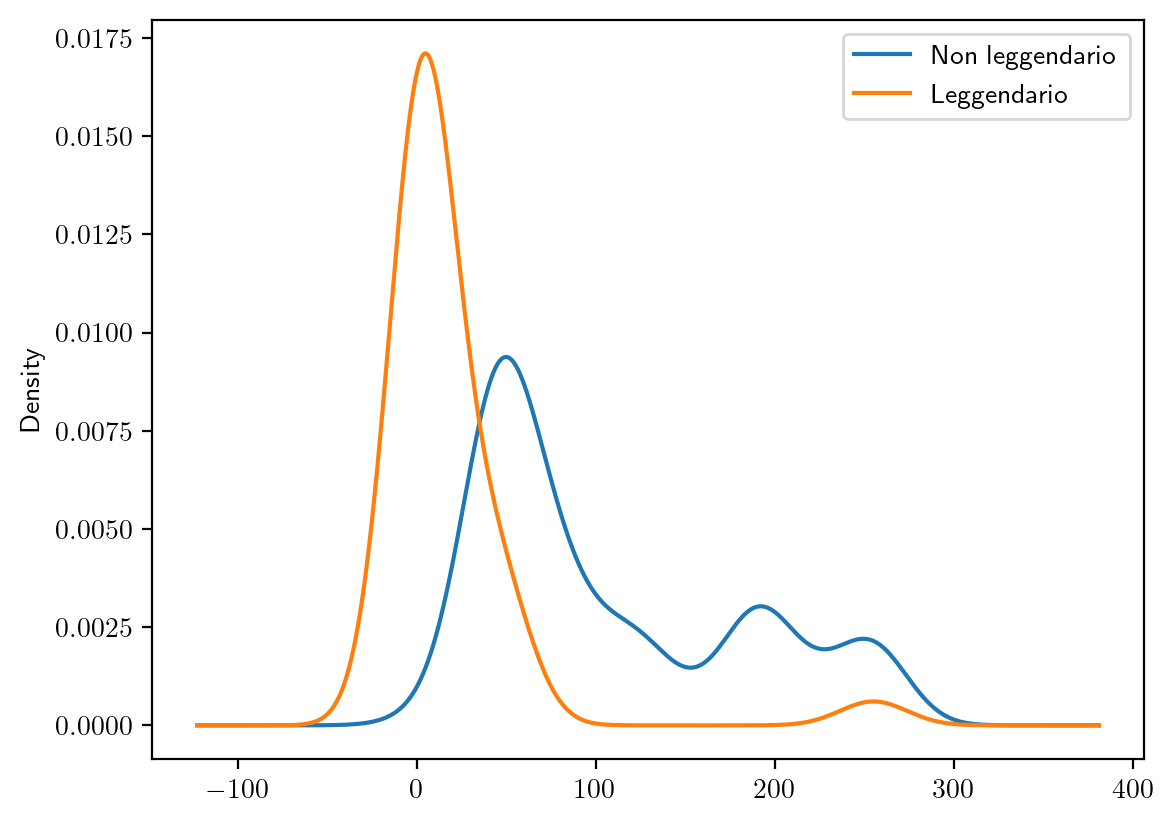

In [151]:
df[df['is_legendary'] == 0].capture_rate.plot.density(label='Non leggendario')
df[df['is_legendary'] == 1].capture_rate.plot.density(label='Leggendario')
plt.legend()
plt.show()

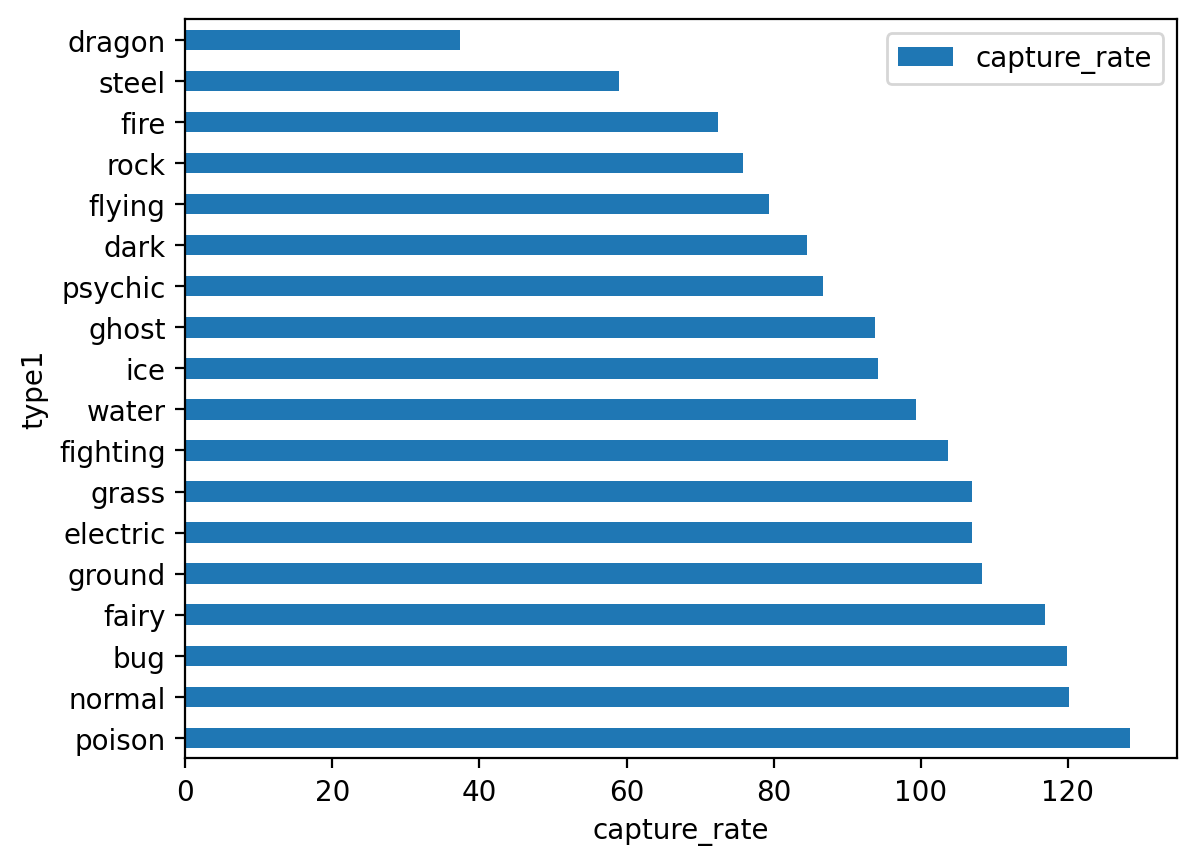

In [101]:
df.groupby('type1')[['capture_rate']].aggregate(lambda x: x.sum() / len(x))\
    .sort_values(by='capture_rate', ascending=False).plot.barh()
plt.xlabel('capture_rate')
plt.show()

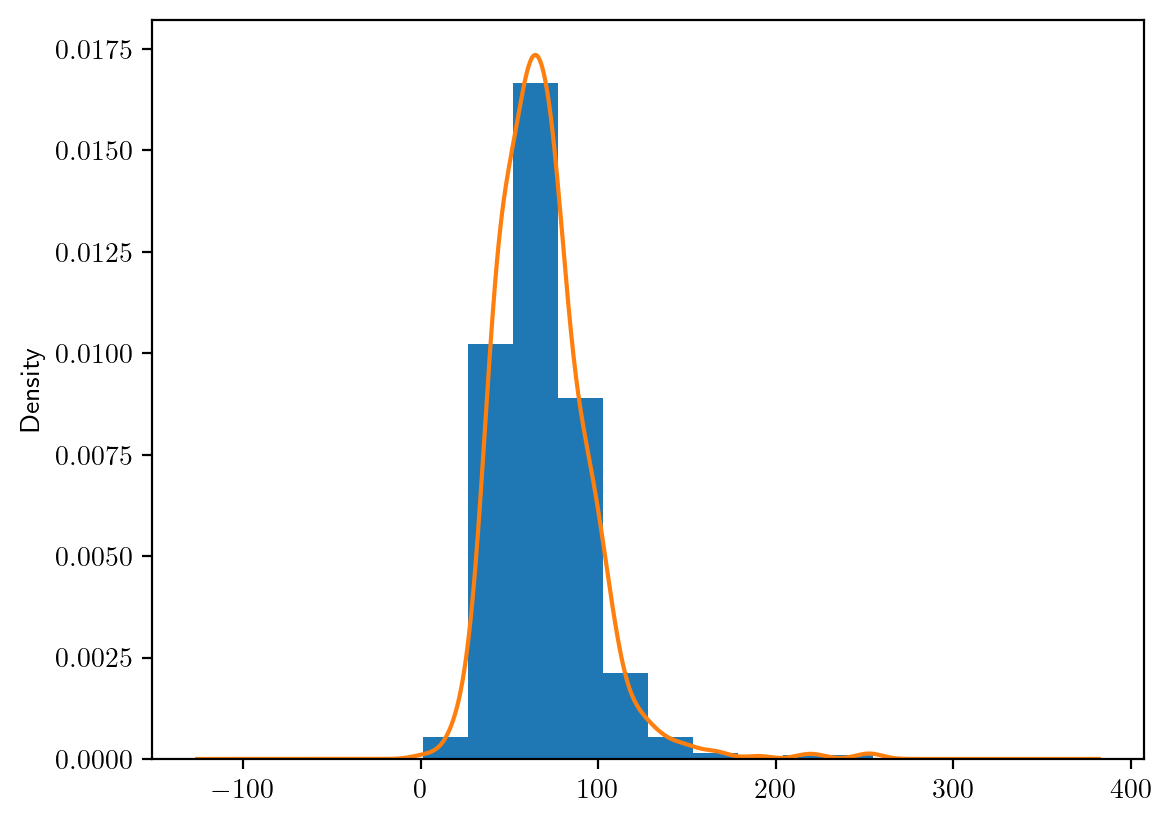

In [153]:
plt.hist(df['hp'], density=True) # Hit Points
df['hp'].plot.kde()
plt.show()

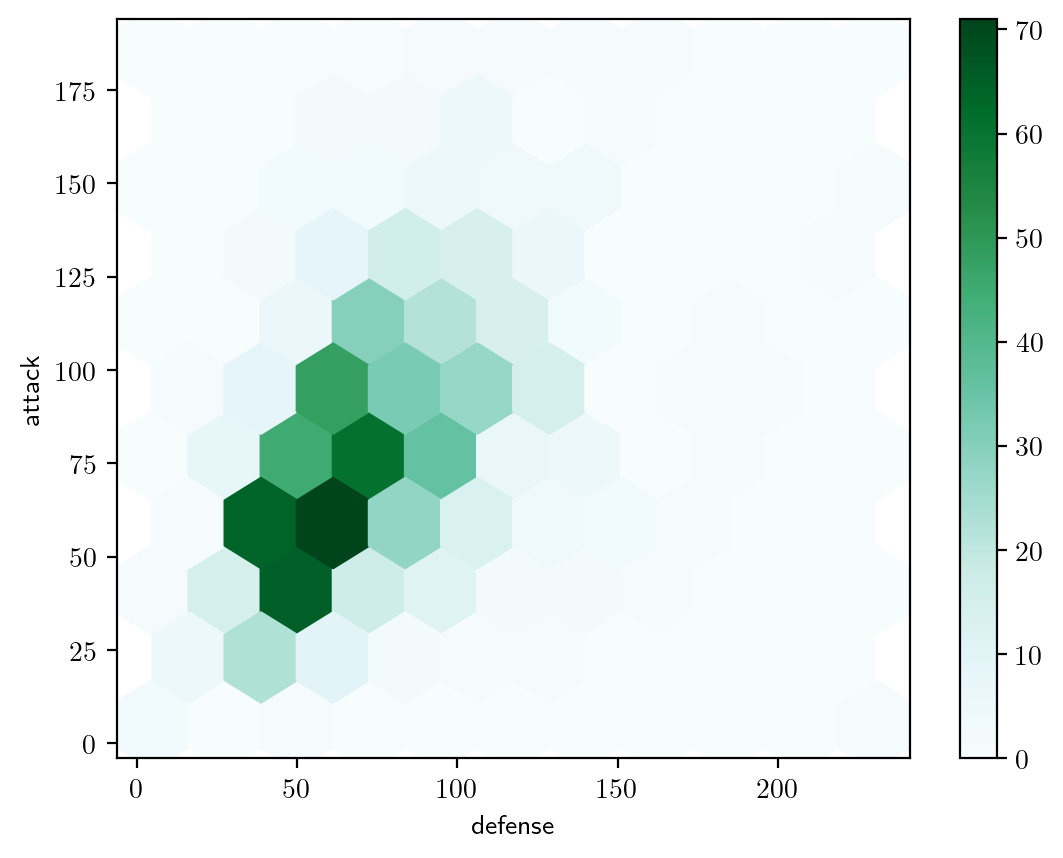

In [154]:
df.plot.hexbin(x='defense', y='attack', gridsize=10)
plt.show()

Modello lineare! Prima volta che ne senti parlare, guarda [questo](https://www.youtube.com/watch?v=nk2CQITm_eo)!

In [102]:
X = df['defense'].values.reshape((-1,1))
y = df['attack'].values

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

In [157]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared (R2) Score:", r2)

Coefficients: [0.49009302]
Intercept: 42.07660414129973
R-squared (R2) Score: 0.2198811964955979


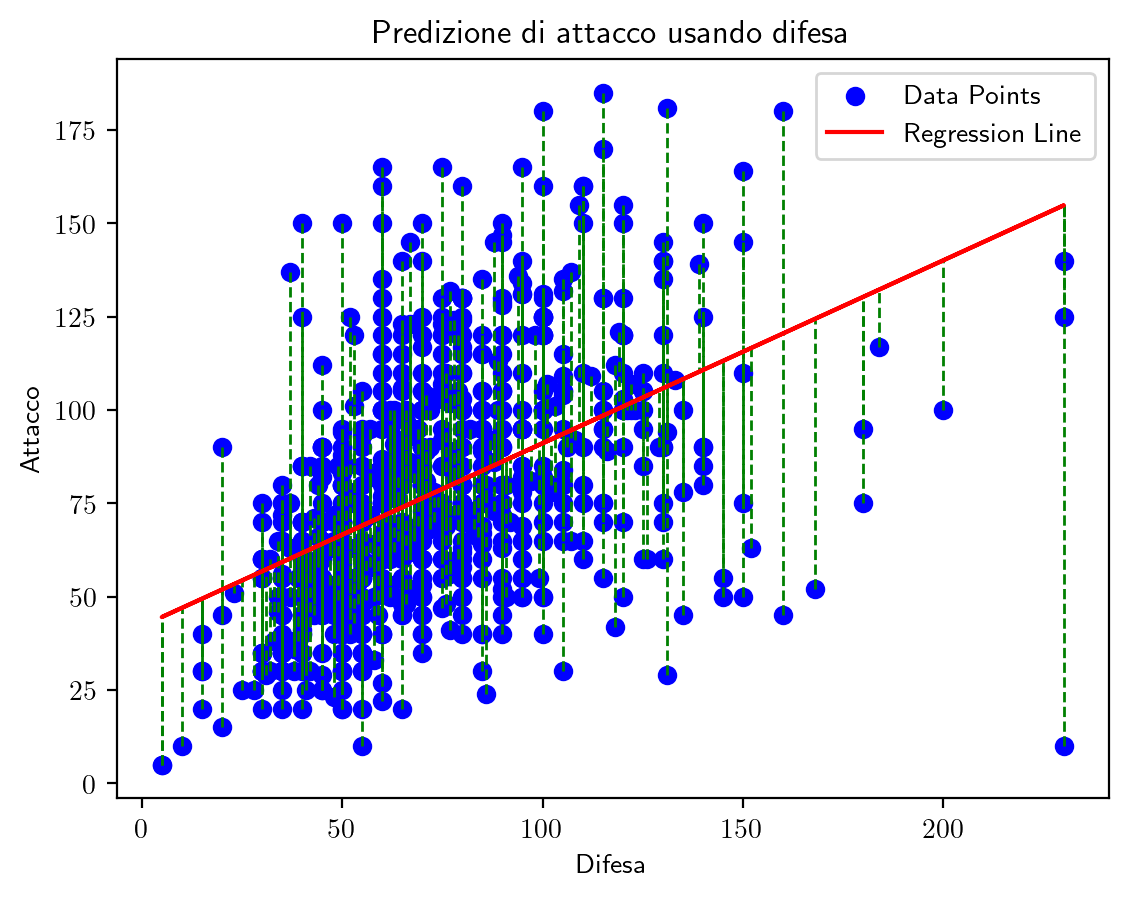

In [158]:
residuals = y - y_pred

# Vertical residuals
for i in range(len(X)):
    x_val = X[i]
    plt.plot([x_val, x_val], [y[i], y_pred[i]], color='green', linestyle='--', linewidth=1)
    
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label='Regression Line', color='red')

plt.xlabel('Difesa')
plt.ylabel('Attacco')
plt.title('Predizione di attacco usando difesa')
plt.legend()
plt.show()

And [much](https://scikit-learn.org/stable/) [more](https://seaborn.pydata.org/)...